Students: <b>Jonas WACKER</b> & <b>Sofiene JERBI</b><br>
Group: <b>user4</b>

In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are as follows:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fudamentals of Decision Trees and Random Forsests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. Classification and regression are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *demensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural questions would be "does it rain now ?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selectiion of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Usecase : Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the jurney of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Inovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departured time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the usecase of this notebook.

**Note:** The source code in this lecture should be executed sequentially in the order.

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparision operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this usecase, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accesed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we can not create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [1]:
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches

# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1
How many records (rows) in the RAW data ?

In [2]:
print("number of rows before cleaning:", raw_data.count())

number of rows before cleaning: 5180049



#### Question 1.2
Except for the first column, the others might contain missing values, which are denoted by `NA`. Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?

NOTE: be careful with the valid values that can contain string `NA` inside.



In [2]:
# extract the header
header = raw_data.first()
print(raw_data.take(2))


# replace invalid data with NULL and remove header
cleaned_data = (raw_data\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(lambda x : re.sub(',NA$', ',', x.replace(",NA,",",,").replace(",NA,",",,")))
        )
        
print("number of rows after cleaning:", cleaned_data.count())

['Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay', '1994,1,7,5,858,900,954,1003,US,227,NA,56,63,NA,-9,-2,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA']
number of rows after cleaning: 5180048


In [3]:
print(cleaned_data.take(2))

['1994,1,7,5,858,900,954,1003,US,227,,56,63,,-9,-2,CLT,ORF,290,,,0,,0,,,,,', '1994,1,8,6,859,900,952,1003,US,227,,53,63,,-11,-1,CLT,ORF,290,,,0,,0,,,,,']


## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [4]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [5]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 2

From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.

Note that, we should only select the necessary features defined above: [ year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, arrival_delay, distance, src_airport, dest_airport]. 

Finally, the data should be cached.

In [6]:
# create dataframe df
df = (sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema)\
    .select(['year', 'month', 'day_of_month', 'day_of_week',
            'scheduled_departure_time','scheduled_arrival_time',
            'arrival_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier'])\
    .cache()
    )

## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports ?
  - How many unique destination airports ?
  - How many carriers ?
  - How many flights that have a scheduled departure time later than 18h00 ?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year ?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days ?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic) ?
  - Which are the top 20 busiest carriers ?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day ?
  - Which hours of the day are characterized by the longest flight delay ?
  - What are the fluctuation of the percentage of delayed flights over different time granularities ?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports ?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers ?

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 3: Basic queries

#### Question 3.1 
How many origin airports ? How many destination airports ?

In [9]:
num_src_airport = df.select('src_airport').distinct().count()
num_dest_airport = df.select('dest_airport').distinct().count()
print("number of origin airports ", num_src_airport)
print("number of destination airports ", num_src_airport)

number of origin airports  224
number of destination airports  224



#### Question 3.2
How many carriers ?

In [10]:
num_carrier = df.select('carrier').distinct().count()
print("the number distinct carriers:", num_carrier)

the number distinct carriers: 10



#### Question 3.3
How many night flights (that is, flights departing later than 6pm) ?

In [11]:
num_night_flights = df[df.scheduled_departure_time > 1800].count()
print("The number of night flights:", num_night_flights)

The number of night flights: 1078203


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 4: Flight volume statistics

#### Question 4.1: 
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.

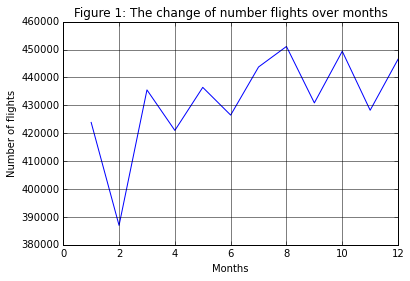

In [12]:
statistic_month = df.select('month').groupBy('month').count().orderBy('month', ascending=1).collect()

pdf_flights_per_month = pd.DataFrame(data=statistic_month)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1: The change of number flights over months')
plt.grid(True,which="both",ls="-")
plt.plot(pdf_flights_per_month[0], pdf_flights_per_month[1])
plt.show()

<div class="comment">
<h4>Comment</h4>
<p>We can see that most flights took place in August, October and December, respectively. The least number of flights took place in February.<br />
Aligning these observations with the school holiday calendar in the US, we conclude the following:</p>

<p><b>High number of December flights</b>: Christmas/Holiday break - Typically there are no classes on Christmas Eve and December 23 might be a half-day. The break lasts until first weekday in January after New Year's Day</p>

<p><b>High number of flights in March</b>: Winter break/Spring break</p>

<p><b>High number of flights during summer</b>: Summer break - Around 10–11 weeks, either from end of May to early August, early June to Mid-August, or the end of June to the day after Labor Day in early September, or late June to the day after Labor Day - depending on region and state.</p>

<p><b>Low number of flights in February</b>: February is typically considered a low-season month for travelling. Airline tickets are rather cheap indicating low demand for flights.

<p>[Source: Wikipedia]</p>


</div>


#### Question 4.2: 
Is there any relationship between the number of flights and the days of the week? Plot a bar chart and interpret the figure.
By answering this question we could learn about the importance of the weekend/weekday feature for our predictive task.

In [13]:
df.select('day_of_week').show(3)

+-----------+
|day_of_week|
+-----------+
|          5|
|          6|
|          1|
+-----------+
only showing top 3 rows



[Row(day_of_week=1, count=754636), Row(day_of_week=2, count=756532), Row(day_of_week=3, count=756864), Row(day_of_week=4, count=751537), Row(day_of_week=5, count=751531), Row(day_of_week=6, count=695245), Row(day_of_week=7, count=713703)]


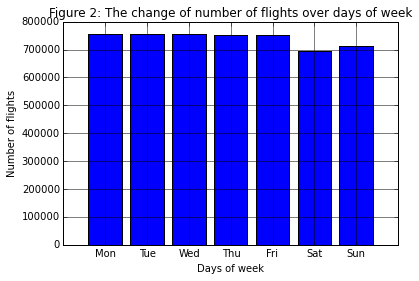

In [14]:
statistic_day_of_week = df.select('day_of_week').groupBy('day_of_week').count().orderBy('day_of_week', ascending=1).collect()
print(statistic_day_of_week)
pdf_flights_per_weekday = pd.DataFrame(statistic_day_of_week)
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2: The change of number of flights over days of week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_flights_per_weekday[0].map(lambda i: map_int_into_day[i])

# plot bar chart
plt.bar(pdf_flights_per_weekday[0], pdf_flights_per_weekday[1], align="center")

plt.xticks(pdf_flights_per_weekday[0], day_of_week_label)
plt.show()

<div class="comment">
<h4>Comment</h4>
We have more or less equal numbers of flights per week-day. There is slightly less traffic on weekends. This is probably due to a lack of business traffic. Moreover, people doing a weekend trip probably arrive on Friday and leave on Sunday, which implies slightly more flights on Sunday than on Saturday.

Also care for the following post:
http://www.huffingtonpost.com/2015/05/14/best-day-to-fly-saturday_n_7283042.html

Quiet Saturdays hence seem to be reasonable.
</div>


#### Question 4.3
How many flights in different days of months and in different hours of days ? Plot  bar charts, and interpret your figures.

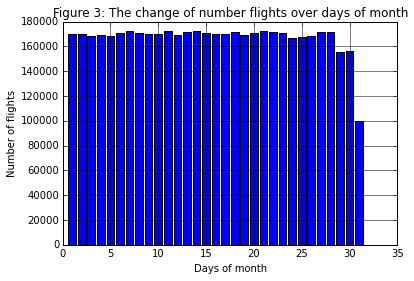

In [15]:
statistic_day_of_month = df.select('day_of_month').groupBy('day_of_month').count().orderBy('day_of_month', ascending=1).collect()
pdf_flights_per_day = pd.DataFrame(statistic_day_of_month)

plt.xlabel("Days of month")
plt.ylabel("Number of flights")
plt.title('Figure 3: The change of number flights over days of month')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_flights_per_day[0], pdf_flights_per_day[1], align="center")

plt.show()

<div class="comment">
<h3>Comment</h3>
We can see that the number of flights per day of the month only fluctuate slightly. Of course there are less flights on the 31 because only 7 months have 31 days. Since 1994 was not a leap year, there were the normal 28 days in February. Therefore, no flights on the 29th and 30th in that month leading to slighly lower flight numbers.</h3>
</div>

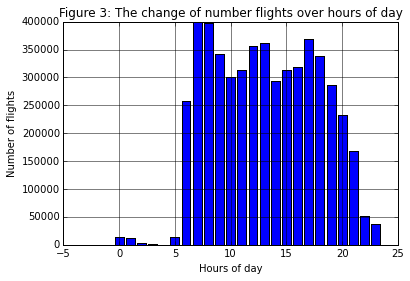

In [16]:
statistic_hour_of_day = df.select('scheduled_departure_time').rdd.map(lambda x: Row(int(x[0]/100))).toDF(['scheduled_departure_time']) \
                        .groupBy('scheduled_departure_time').count().orderBy('scheduled_departure_time', ascending=1).collect()
pdf_flight_per_hour = pd.DataFrame(statistic_hour_of_day)

plt.xlabel("Hours of day")
plt.ylabel("Number of flights")
plt.title('Figure 3: The change of number flights over hours of day')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_flight_per_hour[0], pdf_flight_per_hour[1], align="center")

plt.show()

<div class="comment">
<h3>Comment</h3>
We see that by far the biggest part of the flights take place between 6AM and 9PM. There are barely any night flights because of less demand on the one hand and surely because of governmental flight policies on the other. Flight numbers around 7AM and 8AM are slightly higher, which also makes sense because of business passengers as well as people who want to arrive early.
</div>


#### Question 4.4
Which are the top 20 busiest airports: compute this in terms of aggregate inbound and outbound number of flights ?

In [17]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
            .groupBy(df.dest_airport)
            .agg(func.count('*').alias('count2'))
            )


# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, stat_src.src_airport == stat_dest.dest_airport)

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            # select top airpoint in termns of number of flights
                            .select(col("src_airport").alias("airport"), col("total")).orderBy(desc('total'))
                        )
stat_airport_traffic.show(20)

+-------+------+
|airport| total|
+-------+------+
|    ORD|561461|
|    DFW|516523|
|    ATL|443074|
|    LAX|306453|
|    STL|304409|
|    DEN|285526|
|    PHX|280560|
|    DTW|276272|
|    PIT|262939|
|    CLT|259712|
|    MSP|247980|
|    SFO|235478|
|    EWR|233991|
|    IAH|208591|
|    LGA|203362|
|    BOS|199696|
|    LAS|189920|
|    PHL|186897|
|    DCA|176115|
|    MCO|153720|
+-------+------+
only showing top 20 rows




#### Question 4.5
Which are the top 20 busiest carriers: compute this in terms of number of flights? 


In [18]:

stat_carrier = (df
                .groupBy(df.carrier)
                .agg(func.count('*').alias('count'))
                .orderBy(desc('count'))
                )

stat_carrier.show(20)


+-------+------+
|carrier| count|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
|     CO|484834|
|     NW|482798|
|     TW|258205|
|     HP|177851|
|     AS|117475|
+-------+------+



![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
What is the percentage of delayed flights for different hours of the day? Plot a bar chart and interpret the figure.
Remember: a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.

In [65]:

# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df.arrival_delay >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', (df.scheduled_departure_time/100).cast(LongType()))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(delay_per_hour.hour)

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
            delay_ratio_per_hour
                .orderBy(asc('hour'))
                .select(['hour', 'delay_ratio'])
    ).collect()


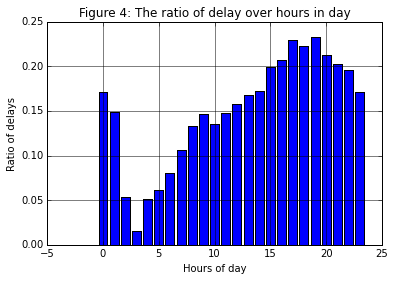

In [20]:

# plot a bar chart

pdf_delay_ratio_per_hour = pd.DataFrame(delay_ratio_per_hour)
plt.xlabel("Hours of day")
plt.ylabel("Ratio of delays")
plt.title('Figure 4: The ratio of delay over hours in day')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align="center")

plt.show()


<div class="comment">
<h3>Comment</h3>
The ratio of delays are the highest in the evening from 5PM-8PM. Taking away the delay proportions between 0AM-3AM and attaching them to the right of the histogram, we obtain a gaussian-like curve, i.e. the further we get away from 5PM-8PM the less likely a delay becomes.
</div>


#### Question 5.2

You will realize that saying "at 4 A.M. there is a very low chance of a flight being delayed" is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for a early flight to be delayed, but if it does, the delay might be huge, like 6 hours! 

Then, the question is: which hours of the day are characterized by the largest delay? Plot a Bar chart and explain it.

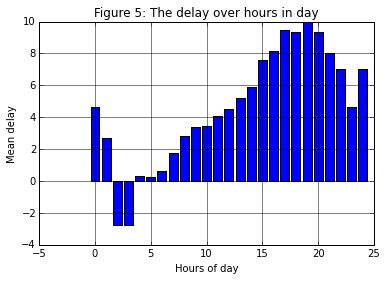

In [21]:

mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy(asc('hour'))
        .select(['hour','mean_delay'])
    ).collect()
    
pdf_mean_delay_per_hour = pd.DataFrame(mean_delay_per_hour)

plt.xlabel("Hours of day")
plt.ylabel("Mean delay")
plt.title('Figure 5: The delay over hours in day')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_mean_delay_per_hour[0], pdf_mean_delay_per_hour[1], align="center")

plt.show()


<div class="comment">
<h3>Comment</h3>
Again we obtain a gaussian-like curve. This time there is a little exception in the distribution: Flights at 2 and 3AM arrive 3 hours earlier on average. Flights at 11PM break the distribution as well. Other than that, the mean hours of delay are pretty much aligned to the ratio of delays.
</div>

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

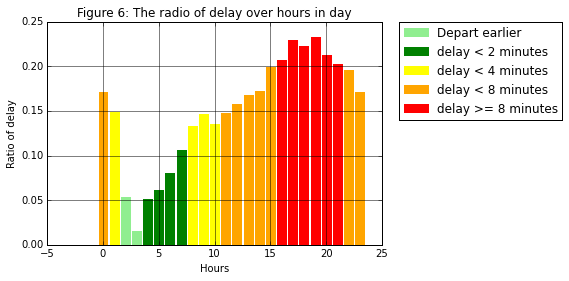

In [22]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In the new figure (Figure 6), we have more information in a single plot. The flights in 3AM to 4AM have very low probability of being delayed, and actually depart ealier than their schedule. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.

This example shows us that the way representing results are also important.



#### Question 5.3
Plot a bar chart to show the percentage of delayed flights over days in a month

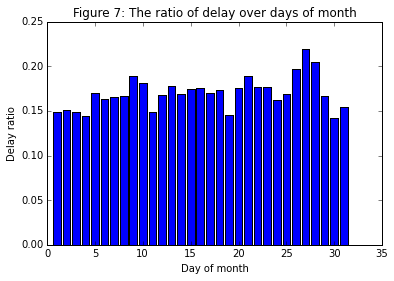

In [66]:
####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # order by day_of_month
        .orderBy('day_of_month')
    ).collect()
    
# collect data and plot
pdf_day_of_month = pd.DataFrame(statistic_day_of_month)
plt.xlabel("Day of month")
plt.ylabel("Delay ratio")
plt.title('Figure 7: The ratio of delay over days of month')
plt.bar(pdf_day_of_month[0], pdf_day_of_month[1], align="center")
plt.show()


<div class="comment">
<h3>Comment</h3>
We observe comparatively low mean delays on: 1, 2, 3, 4, 11 , 19, 24, 30, 31<br />
In 1994 on all of these days there was at least one public holiday except for the 2nd. Moreover, almost all of these days had an above average quote of weekend days (Saturday and Sunday) during which there is slightly less airline traffic (as we saw above). We conclude that the drop in traffic causes a drop in mean delays.<br />
There are particularly high delay peaks on the 9th, the 21st and the 27th. The 21st and the 27th might be due to a large increase in travels around the Christmas holidays in December.
</div>


#### Question 5.4
Plot a bar chart to show the percentage of delayed flights over days in a week

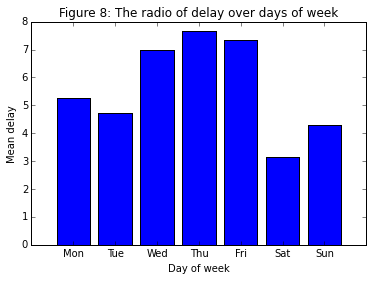

In [24]:

####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
    df_with_delay
        .groupBy('day_of_week')
        .agg(
            (func.mean('arrival_delay')).alias('mean_delay')
        )
        .orderBy('day_of_week')
    ).collect()
    
# collect data and plot
pdf_day_of_week = pd.DataFrame(statistic_day_of_week)
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])

plt.xlabel("Day of week")
plt.ylabel("Mean delay")
plt.bar(pdf_day_of_week[0], pdf_day_of_week[1], align="center")

plt.title('Figure 8: The radio of delay over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()


<div class="comment">
<h3>Comment</h3>
The mean delay Saturday and Sunday is lower than during the week which is probably due to the lower number of flights on these days.<br />
However, we also see that the delay is centered around Wednesday, Thursday and Friday.
</div>


#### Question 5.5
Plot a bar chart to show the percentage of delayed flights over months in a year

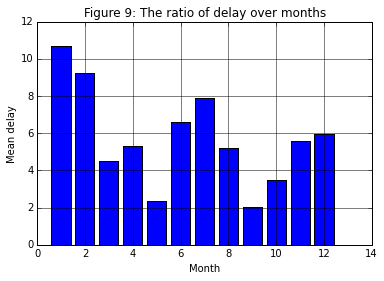

In [43]:

####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    df_with_delay
        .groupBy('month')
        .agg(
            func.mean('arrival_delay').alias('mean_delay')
            #(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        )
        .orderBy('month')
    ).collect()

# collect data and plot
pdf_month = pd.DataFrame(statistic_month)

plt.xlabel("Month")
plt.ylabel("Mean delay")
plt.bar(pdf_month[0], pdf_month[1], align="center")
plt.grid(True,which="both",ls="-")

plt.title('Figure 9: The ratio of delay over months')
plt.show()


<div class="comment">
<h3>Comment</h3>
We can see that the mean delay in the beginning of the year and during summer is the highest. The lowest delays are in May and September. According to the US school holiday schedule the summer break is over in September at the latest. Therefore, we can assume that the flight schedule becomes regular again in that month so that delays can be foreseen and prevented more easily. The same goes for the month of May which is just before the summer break.
</div>

We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)

Putting things together, we can have a global picture of the whole year!

In [44]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())

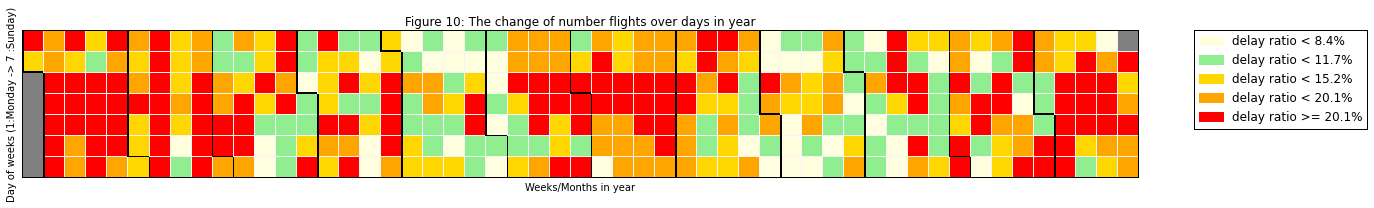

In [45]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months in year")
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)")
plt.title('Figure 10: The change of number flights over days in year')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


#### Question 5.6
Explain figure 10.

<div class="answer">
<h3>Comment</h3>
Figure 10 gives us a good summary over the delay statistics seen before. The delay ratio is depicted with respect to every day of the year 1994 categorized into days of the week, weeks and months.<br />
We can quickly see that the beginning, the end of the year as well as the summer periods have a high ratio of delays. Before we could only say that the average hours of delays was high in those months.<br />
In particular, Wednesday, Thursday and Friday are hit by high delay ratios in this timeframe. Again this is well aligned with the average hours of delay.
</div>


#### Question 5.7

What is the delay probability for the top 20 busiest airports?
By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relaltionship between aiports, number of flights and the delay.

HINT: Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.

In [49]:

####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(col("src_airport").isin(top_20_airports))
        # group by source airport
        .groupBy('src_airport')
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['src_airport'])
    )
statistic_ratio_delay_airport.show(20)


+-----------+-------------------+
|src_airport|        delay_ratio|
+-----------+-------------------+
|        ATL|0.21205403501801467|
|        BOS|0.20337767149902855|
|        CLT|0.22251161209048542|
|        DCA| 0.1599864322460286|
|        DEN|0.20354670607451195|
|        DFW|0.22524719636014578|
|        DTW|0.17069213736050923|
|        EWR|0.26439606741573035|
|        IAH| 0.1660171622737133|
|        LAS|0.17218759213241797|
|        LAX|0.16996104082244257|
|        LGA|0.19028312259483232|
|        MCO|  0.167725622406639|
|        MSP|0.15585690866890653|
|        ORD|0.16788302771286917|
|        PHL|0.21505583159694394|
|        PHX|0.17194317278139576|
|        PIT|0.21883994899867915|
|        SFO|0.16634949633351095|
|        STL|0.18877507271995725|
+-----------+-------------------+



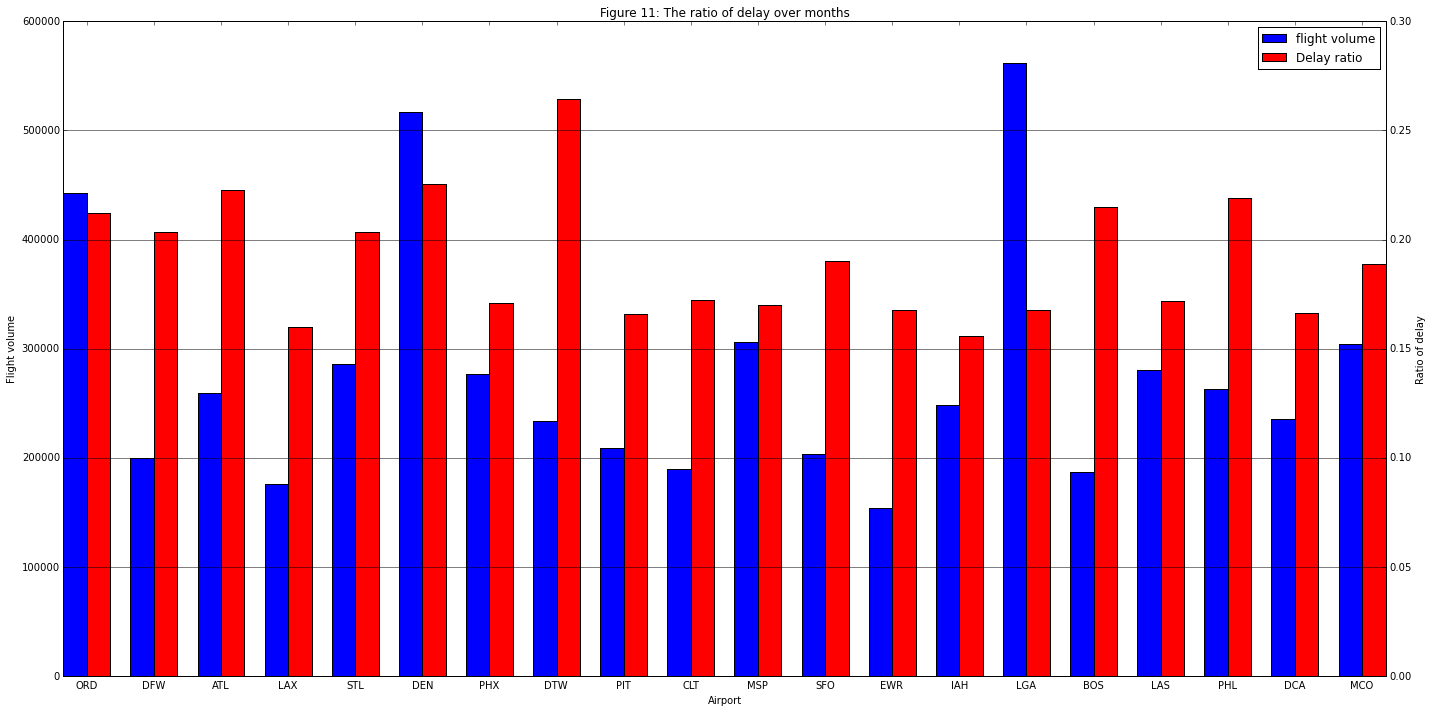

In [50]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.take(K), columns=['src_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by='src_airport')
#print(pdf_top_20_airport_volume)
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Figure 11: The ratio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="comment">
<h3>Comment</h3>
The flight volume of each airport and the delay ratio seem to have less correlation than one might expect. E.g. LGA has the highest flight volume but only a medium delay ratio. BOS has a low flight volume but an above-average delay ratio.<br />
<strong>However, we should also look at the kinds of flights and their impact on delays. Maybe long-distance flights are more prone to delays than short-distance flights or the other way around. Therefore, airports with different kinds of traffic may be affected by the delays in a special way.</strong>
</div>


#### Question 5.8
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers? Comment the figure!

In [52]:

K = 20
stat_carrier
# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        .filter(col('carrier').isin(top_20_carriers))
        # group by carriers
        .groupBy('carrier')
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['carrier'])
    )
statistic_ratio_delay_carrier.show(20)


+-------+-------------------+
|carrier|        delay_ratio|
+-------+-------------------+
|     AA| 0.1752444006939166|
|     AS| 0.1596424771227921|
|     CO| 0.1955576547849367|
|     DL|0.18328443065157582|
|     HP|0.18625141269939444|
|     NW| 0.1294806523639286|
|     TW|0.18212273193780135|
|     UA| 0.1686528375733855|
|     US|0.18422298014001534|
|     WN|0.12829795587751536|
+-------+-------------------+



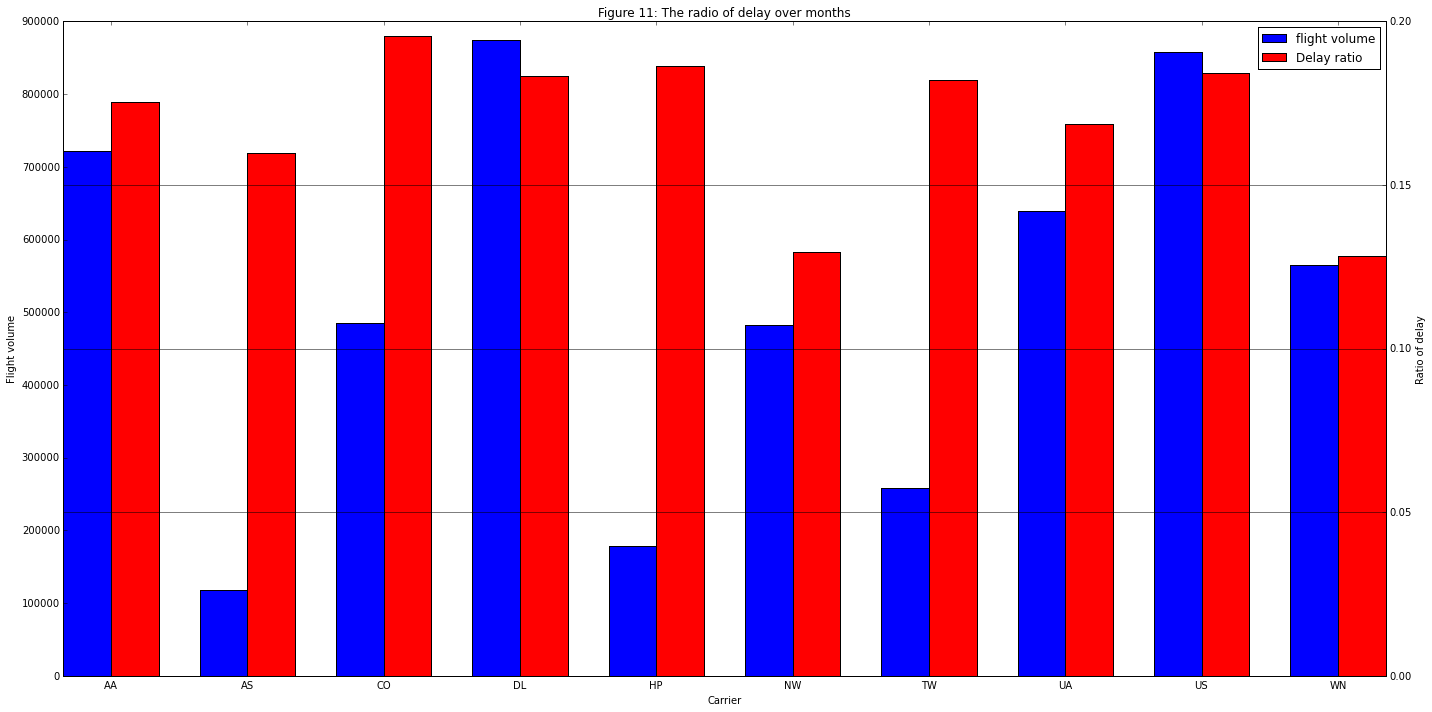

In [53]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_carrier.take(K), columns=['carrier', 'count'])
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by='carrier')
#print(pdf_top_20_carrier_volume)
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_carriers)

plt.title('Figure 11: The radio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="comment">
<h3>Comment</h3>
Again delay ratios and flight volumes do not seem to have a high correlation. It is interesting to see though that certain carriers have much less delays than others.<br />
<strong>Again we should look at the kinds of flights they offer!</strong>
</div>

# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This datastructure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to an unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with it's most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numberical. We can use a naïve approach: map each value of each feature to an unique index.

#### Question 6.1
Calculate the frequency of each source aiport in the data and build a dictionary that maps each of them to a unique index.

Note: we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.

In [7]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy('src_airport')
        .agg(func.count('*').alias('count1'))
        .orderBy(desc('count1'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
2



#### Question 6.2
Calculate the frequency of each destination aiport in the data and build a dictionary that maps each of them to a unique index.

In [8]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df
        .groupBy('dest_airport')
        .agg(func.count('*').alias('count2'))
        .orderBy(desc('count2'))
    )

dest_airports = [item[0] for item in stat_dest.collect()]

num_dest_airports = len(dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, range(0, num_dest_airports)))

# test the dictionary
print(map_dest_airport_to_index['ORD'])
print(map_dest_airport_to_index['ATL'])

0
2



#### Question 6.3
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.

In [9]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top

stat_carr = (
    df
        .groupBy('carrier')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

carriers = [item[0] for item in stat_carr.collect()]

num_carriers = len(carriers)
map_carriers_to_index = dict(zip(carriers, range(0, num_carriers)))

print(map_carriers_to_index['DL'])
print(map_carriers_to_index['AA'])

0
2


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values : replacing them with the most common value of the corresponding feature.

**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).


#### Question 7.1
Find the most common value of feature `month` in data.



In [10]:
the_most_common_month = (
    df
        .groupBy('month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 8



#### Question 7.2
Find the most common value of features `day_of_month` and `day_of_week`.

In [11]:
the_most_common_day_of_month = (
    df
        .groupBy('day_of_month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df
        .groupBy('day_of_week')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3



#### Question 7.3
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.

In [12]:
the_most_common_s_departure_time = (
    df
        .groupBy('scheduled_departure_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df
        .groupBy('scheduled_arrival_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915



#### Question 7.4
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.

In [13]:
# calculate mean distance
mean_distance = (
    df
        .agg(func.avg('distance').alias('avg'))
    ).first()[0]

print("mean distance:", mean_distance)

mean distance: 670.7402911985982



#### Question 7.5
Calculate the mean of arrival delay.

In [14]:
# calculate mean arrival delay
mean_arrival_delay = (
    df
        .agg(func.avg('arrival_delay').alias('avg'))
    ).first()[0]

print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 8
- Replace the missing values of each feature in our data by the corresponding most common value or mean.
- Divide data into two parts: 70% for training and 30% for testing

In [15]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time , # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                    else map_src_airport_to_index[src_airports[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17]) \
                    else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

## 5.4 Building a decision tree model

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 9
We can train a decision model by using function `DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.

Where,

* `training_data` : the data used for training
* `categorical_info` : a dictionary that maps the index of each categorical features to its number of distince values
* `impurity_function` : the function that is used to calculate impurity of data in order to select the best split
* `max_depth`: the maximum depth of the tree
* `max_bins`: the maximum number of bins that the algorithm will divide on each feature. Note that, `max_bins` can not smaller than the number distinct values of every categorical features.

Complete the code below to train a decision tree model.


In [16]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

## 5.5 Testing the decision tree model

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 10
#### Question 10.1
We often use Mean Square Error as a metric to evaluate the quality of a tree model. Complete the code below to calculate the MSE of our trained model.

In [93]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 496.3284222804643



### Question 10.2
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays? Use your own words to describe and interpret the value you obtained for the MSE.

<h3>Comment</h3>
We obtain a mean squared error value of 496. This value states that on average our predictions are sqrt(496)=22 minutes wrong.
Given that our average airplane delay is 5.6 minutes, this prediction error seems quite high.
However, when calculating the mean squared error, we do not at all take the variation of prediction errors into account.
It might be that we are more accurate on low delays and less accurate on large ones, which would be better than having the same error on all kinds of delays.

## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


### Question 11
Train a random decision forest model and evaluate its quality using MSE metric. Compare to decision tree model and comment the results. Similarly to question 10.2, comment with your own words the MSE value you have obtained.

In [17]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)


forest_predictions = forest_model.predict(testData.map(lambda x: x.features))
forest_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(forest_predictions)
testMSE = forest_labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 483.41868021478973


<h3>Comment</h3>
We could improve the results using a random forest instead of a single decision tree. The MSE went down from 496 to 483.
The improvement (3%) is significant but still not very explanatory. Again, we would need to look at the variations of errors w.r.t. different types of delays to do a proper reasoning.


## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-paramter space a little bit.

For more information about parameter tunning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)



### Question 12
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on reccommender systems, that is using nested for loops.

**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!

In [ ]:
for numTrees in [10,20,30]:
    for maxDepth in [12,14,16]:
        for maxBins in [255,300]:
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=maxBins)
            forest_predictions = forest_model.predict(testData.map(lambda x: x.features))
            forest_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(forest_predictions)
            testMSE = forest_labelsAndPredictions.map(
                lambda p: (p[0]-p[1])**2).mean()
            print('Test Mean Squared Error for numTrees = %f, maxDepth = %f, maxBins = %f: %f' % (numTrees,maxDepth,maxBins,testMSE))

Test Mean Squared Error for numTrees = 10.000000, maxDepth = 12.000000, maxBins = 255.000000: 484.630389
Test Mean Squared Error for numTrees = 10.000000, maxDepth = 12.000000, maxBins = 300.000000: 483.827805
Test Mean Squared Error for numTrees = 10.000000, maxDepth = 14.000000, maxBins = 255.000000: 466.717911
Test Mean Squared Error for numTrees = 10.000000, maxDepth = 14.000000, maxBins = 300.000000: 466.242683
Test Mean Squared Error for numTrees = 10.000000, maxDepth = 16.000000, maxBins = 255.000000: 449.318290
Test Mean Squared Error for numTrees = 10.000000, maxDepth = 16.000000, maxBins = 300.000000: 447.459153
Test Mean Squared Error for numTrees = 20.000000, maxDepth = 12.000000, maxBins = 255.000000: 483.016950
Test Mean Squared Error for numTrees = 20.000000, maxDepth = 12.000000, maxBins = 300.000000: 481.190994
Test Mean Squared Error for numTrees = 20.000000, maxDepth = 14.000000, maxBins = 255.000000: 463.866811


<h1 style='color: blue'>ADDITIONAL WORK</h1>

## 5.8. Gradient Boosted Trees

In [20]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel

categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2, 11: 2}

# Train a GradientBoostedTrees model.
gbt_model = GradientBoostedTrees.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info, loss="leastSquaresError",
                                    learningRate=0.1, numIterations=10, maxDepth=12, maxBins=255)

print("training done")
gbt_predictions = gbt_model.predict(testData.map(lambda x: x.features))
gbt_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(gbt_predictions)
testMSE = gbt_labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

training done
Test Mean Squared Error = 448.4503804227904


We tried another implementation available on the MLLib library which is Gradient boosted trees with some random variables. We notice that it performs a lot better than Random Forest with the same maxDepth (about 8% better) but it takes a lot more time to train the model (about 25minutes for this one), that's why we didn't investigate it more even though the code for parameter tuning is below.

In [ ]:
for maxDepth in [12,16,20]:
    for maxBins in [255,350,450]:
        for learningRate in [0.001,0.01,0.1,1]:
            for numIterations in [10,50,100]:
                gbt_model = GradientBoostedTrees.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info, loss="leastSquaresError",
                                        learningRate=0.1, numIterations=100, maxDepth=12, maxBins=255)
                gbt_predictions = gbt_model.predict(testData.map(lambda x: x.features))
                gbt_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(gbt_predictions)
                testMSE = gbt_labelsAndPredictions.map(
                    lambda p: (p[0]-p[1])**2).mean()
                print('Test Mean Squared Error for numTrees = %f, maxDepth = %f, maxBins = %f: %f' % (numTrees,maxDepth,maxBins,testMSE))

<h3>Comments of the limitations of the current approach (Introduction to additional work):</h3>

Up until now we see the following opportunities for improvement of the current model:
- Include inter-flight dependencies: A late arrival of one flight may cause a late departure and therefore arrival of another one
- Flight delays may depend on the type of aircraft used (old aircrafts might need more last-minute maintenance than new ones or the other way around)
- Weather information: Rainy/stormy weather may cause delays
- There are different types of delays (also contained in the dataset, e.g. CarrierDelay). Our current features may be suitable only for a few of them
- The number passengers and the difference between passenger and cargo flights may have an impact (passengers might be late/unorganized)
- We are only looking at a single year (1994), which has a very specific distribution of weekends over days of the month etc. Moreover, we are training our model using a Train/Test-Split with both parts coming from 1994. Predicting flights in 1995 may produce different results.

## 6.1. Adding a new feature: holidays

One of the suggested ideas for additional work in this Lab was to add new features. Inspiring ourselves from the is_weekend feature, we wanted to add a is_holidays feature that should translate the increase of flights during public holidays in the US.

For that we prepared a csv document gathering the federal holidays from 1994 to 2020 that we got from a governmental US website: https://catalog.data.gov/dataset/federal-holidays

In [48]:
!hdfs dfs -copyFromLocal /root/work/data/holidays.csv ./holidays.csv

The idea is to also distinguish the days that are around the public holidays because people usually travel 1-2 days before or after the holidays.

In [14]:
import datetime

path_hol = "holidays.csv"
raw_holidays = sc.textFile(path_hol)
header = raw_holidays.first()

cleaned_holidays = (raw_holidays\
        # filter out the header
        .filter(lambda x: x != header)
        # take the date and put it in a tuple
        .map(lambda x : tuple([int(y) for y in x.split(",")[1].split(".")]))
        )
print(cleaned_holidays.first())

hday = cleaned_holidays.collect()
print(hday[0])

def around_holidays(hday):
    hday_m1 = []
    hday_p1 = []
    hday_m2 = []
    hday_p2 = []
    for d in hday:
        date = datetime.date(d[2],d[1],d[0])
        n_d = date-datetime.timedelta(days=1)
        hday_m1+=[(n_d.day,n_d.month,n_d.year)]
        n_d = date+datetime.timedelta(days=1)
        hday_p1+=[(n_d.day,n_d.month,n_d.year)]
        n_d = date-datetime.timedelta(days=2)
        hday_m2+=[(n_d.day,n_d.month,n_d.year)]
        n_d = date+datetime.timedelta(days=2)
        hday_p2+=[(n_d.day,n_d.month,n_d.year)]
    return(hday_m1,hday_p1,hday_m2,hday_p2)


hday_m1,hday_p1,hday_m2,hday_p2 = around_holidays(hday)

print(hday_m1[0])
print(hday_p1[0])
print(hday_m2[0])
print(hday_p2[0])


(1, 1, 1994)
(1, 1, 1994)
(31, 12, 1993)
(2, 1, 1994)
(30, 12, 1993)
(3, 1, 1994)


In [19]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

def is_holidays(d,m,y):
    day = (d,m,y)
    if day in hday:
        return(1)
    elif day in hday_m1:
        return(1)
    elif day in hday_p1:
        return(1)
    elif day in hday_m2:
        return(1)
    elif day in hday_p2:
        return(1)
    else:
        return(0)

new_data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time , # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                    else map_src_airport_to_index[src_airports[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17]) \
                    else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                is_holidays(int(values[2]),int(values[1]),int(values[0]))
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = new_data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

We tried many labellings of the days around holidays, to see how good the model performs for each of them 

One category for each day in a 2-day interval of the holiday and one category for all the other days:

In [61]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2, 11: 6}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 453.3223789140418


One category for the 1-day interval of the holiday and one category for all the other days:

In [20]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2, 11: 2}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 451.32350289545576


One category for the 2-day interval of the holiday and one category for all the other days:

In [22]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2, 11: 2}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 447.82285799398477


We notice that we get the best performance for the model taking the 2-day interval of the holiday in one category and the normal days in another category. All of these days should be taken equally.
The gain in performance is not that high though, that's why we should maybe consider other features, like weather data.

## 6.2. Adding other new features: weather data

Here we use another year of data because it actually has less missing data (especially the CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay features to link with the following part of our work).

In [18]:
path_04 = "/datasets/airline/2004.csv"
raw_04 = sc.textFile(path_04)

In [19]:
# extract the header
header = raw_04.first()
print(raw_04.take(2))


# replace invalid data with NULL and remove header
cleaned_data_04 = (raw_04\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(lambda x : re.sub(',NA$', ',', x.replace(",NA,",",,").replace(",NA,",",,")))
        )

['Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay', '2004,1,12,1,623,630,901,915,UA,462,N805UA,98,105,80,-14,-7,ORD,CLT,599,7,11,0,,0,0,0,0,0,0']


In [20]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema_04 = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_hour", StringType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_hour",   StringType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), False), \
    StructField("weather_delay",            IntegerType(), False), \
    StructField("nas_delay",                IntegerType(), False), \
    StructField("security_delay",           IntegerType(), False), \
    StructField("late_aircraft_delay",      IntegerType(), False)\
])

In [21]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns_04 = cleaned_data_04.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            cols[5][:-2]  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            cols[7][:-2]  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

In [22]:
# create dataframe df
df_04 = (sqlContext.createDataFrame(cleaned_data_to_columns_04, airline_data_schema_04)\
    .select(['year', 'month', 'day_of_month', 'day_of_week',
            'scheduled_departure_hour','scheduled_arrival_hour',
            'arrival_delay', 'departure_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier', 'carrier_delay', 'weather_delay',
             'nas_delay', 'security_delay', 'late_aircraft_delay'])\
    .cache()
    )

We get the list of the airports with most traffic to gather weather data for, because we cannot do it for all the aiports (limitations of the API we are using to get the data).

In [19]:
# consider outbound flights
stat_src_04 = (df_04
            .groupBy(df_04.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest_04 = (df_04
            .groupBy(df_04.dest_airport)
            .agg(func.count('*').alias('count2'))
            )


# full join the statistic of inbound flights and outbound flights
stat_airports_04 = stat_src_04.join(stat_dest_04, stat_src_04.src_airport == stat_dest_04.dest_airport)

# TOP 30 BUSIEST AIRPORTS
stat_airport_traffic_04 = (stat_airports_04
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports_04['count1'] + stat_airports_04['count2'])
                            # select top airpoint in termns of number of flights
                            .select(col("src_airport").alias("airport"), col("total")).orderBy(desc('total'))
                        )
stat_airport_traffic_04.show(30)

+-------+------+
|airport| total|
+-------+------+
|    ATL|835061|
|    ORD|752376|
|    DFW|688856|
|    LAX|465353|
|    CVG|415948|
|    IAH|404126|
|    PHX|340445|
|    LAS|316334|
|    EWR|316287|
|    DEN|310407|
|    MSP|293879|
|    DTW|293193|
|    SLC|277594|
|    IAD|265615|
|    BOS|264705|
|    SFO|260118|
|    LGA|255074|
|    PHL|243476|
|    SEA|218807|
|    MCO|217525|
|    CLT|215308|
|    BWI|212118|
|    DCA|186777|
|    CLE|186518|
|    MDW|183454|
|    JFK|183009|
|    SAN|172177|
|    TPA|143553|
|    OAK|141687|
|    FLL|133023|
+-------+------+
only showing top 30 rows



In [20]:
[x[0] for x in stat_airport_traffic_04.take(50)]

['ATL',
 'ORD',
 'DFW',
 'LAX',
 'CVG',
 'IAH',
 'PHX',
 'LAS',
 'EWR',
 'DEN',
 'MSP',
 'DTW',
 'SLC',
 'IAD',
 'BOS',
 'SFO',
 'LGA',
 'PHL',
 'SEA',
 'MCO',
 'CLT',
 'BWI',
 'DCA',
 'CLE',
 'MDW',
 'JFK',
 'SAN',
 'TPA',
 'OAK',
 'FLL',
 'MIA',
 'SJC',
 'PIT',
 'RDU',
 'STL',
 'BNA',
 'MCI',
 'HOU',
 'PDX',
 'MSY',
 'MEM',
 'SMF',
 'SNA',
 'DAL',
 'IND',
 'AUS',
 'CMH',
 'SAT',
 'ABQ',
 'ONT']

This little piece of code gather the weather data from the API for the list of aiports we want info on (we actually used it outside the cluster).

In [ ]:
#Code to gather weather data from api.wunderground.com
import requests
import datetime

def format(num):
    if len(num)==1:
        return('0'+num)
    else:
        return(num)

#API_Key = "Enter API Key Here"

csv = open("weather.csv","a+")
arpts=['ATL','DFW','CVG','IAH','PHX','EWR','MSP','DTW','SLC','IAD','SFO','LGA','PHL','MCO','CLT','BWI','DCA','CLE','MDW','JFK','TPA','FLL','SJC','PIT','RDU','STL','BNA','MCI','PDX','MSY','SMF','SNA','IND','CMH','ABQ','ONT']
arpt_dic={'ORD':'Chicago-O\'Hare International', 'LAX':'Los Angeles International', 'LAS':'McCarran International', 'DEN':'Denver International', 'BOS':'Logan International', 'SEA':'Seattle-Tacoma International', 'SAN':'San Diego International-Lindbergh', 'OAK':'Metro Oakland International', 'MIA':'Miami International', 'HOU':'TX/Hobby', 'MEM':'Memphis International', 'DAL':'Dallas Love', 'AUS':'Austin Bergstrom International', 'SAT':'San Antonio International'}
for arpt in arpts:
    arpt_dic[arpt]=arpt
arpts = ['ATL','ORD','DFW','LAX','CVG','IAH','PHX','LAS','EWR','DEN','MSP','DTW','SLC','IAD','BOS','SFO','LGA','PHL','SEA','MCO','CLT','BWI','DCA','CLE','MDW','JFK','SAN','TPA','OAK','FLL','MIA','SJC','PIT','RDU','STL','BNA','MCI','HOU','PDX','MSY','MEM','SMF','SNA','DAL','IND','AUS','CMH','SAT','ABQ','ONT']
for arpt in arpts:
    print(arpt)
    date = datetime.date(2004,1,1)
    while (date!=datetime.date(2005,1,1)):
        d=str(date.year)+format(str(date.month))+format(str(date.day))
        url = 'http://api.wunderground.com/api/'+API_Key+'/history_'+d+'/q/'+arpt_dic[arpt]+'.json'
        while True:
            try:
                day = requests.get(url).json()
                break
            except KeyboardInterrupt:
                break
            except:
                print("URL request failed.")
        hours = day['history']['observations']
        header = arpt+","+str(date.year)+","+format(str(date.month))+","+format(str(date.day))
        for x in hours:
            features = ['icon','tornado','thunder','fog','hail','snow','rain','precipm','vism','wspdm']
            line = header+","+x['date']['hour']+","+x['date']['min']
            for i in features:
                line+=","+x[i]
            csv.write(line+'\n')
        date = date+datetime.timedelta(days=1)

We process this data to create DFs/RDDs.

In [23]:
path_wthr = "weather.csv"
path_wthr2 = "weather2.csv"
raw_wthr = sc.textFile(path_wthr) + sc.textFile(path_wthr2)

sqlContext = SQLContext(sc)

# Declare the data schema
wthr_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("airport",                  StringType(), True), \
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(),  True), \
    StructField("day",                      IntegerType(),  True), \
    StructField("hour",                     IntegerType(),  True), \
    StructField("minutes",                  IntegerType(),  True), \
    StructField("label",                    StringType(), True), \
    StructField("tornado",                  IntegerType(), True), \
    StructField("thunder",                  IntegerType(),  True), \
    StructField("fog",                      IntegerType(),  True), \
    StructField("hail",                     IntegerType(),  True), \
    StructField("snow",                     IntegerType(), True), \
    StructField("rain",                     IntegerType(), True), \
    StructField("precipitation",            FloatType(), True), \
    StructField("visibility",               FloatType(), True), \
    StructField("wind_speed",               FloatType(), True)\
])

# convert each line into a tuple of features (columns)
cleaned_wthr_to_columns = raw_wthr.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            cols[0]         if cols[0] else None,
            int(cols[1])    if cols[1] else None,
            int(cols[2])    if cols[2] else None,
            int(cols[3])    if cols[3] else None,
            int(cols[4])    if cols[4] else None,
            int(cols[5])    if cols[5] else None,
            cols[6]    if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            int(cols[8])  if cols[8] else None,
            int(cols[9])  if cols[9] else None,
            int(cols[10])  if cols[10] else None,
            int(cols[11])  if cols[11] else None,
            int(cols[12])  if cols[12] else None,
            float(cols[13])  if cols[13] else None,
            float(cols[14])  if cols[14] else None,
            float(cols[15])  if cols[15] else None
         ))

# create dataframe df
df_wthr = (sqlContext.createDataFrame(cleaned_wthr_to_columns, wthr_data_schema)\
    .cache()
    )

In [24]:
df_wthr_src = df_wthr.select(*(col(x).alias(x + '_src') for x in df_wthr.columns))
df_wthr_dest = df_wthr.select(*(col(x).alias(x + '_dest') for x in df_wthr.columns))

df_04_wthr_src = df_04.join(df_wthr_src, (df_04.src_airport==df_wthr_src.airport_src) & (df_04.month==df_wthr_src.month_src) \
                            & (df_04.day_of_month==df_wthr_src.day_src) & (df_04.scheduled_departure_hour==df_wthr_src.hour_src))

df_04_wthr_dest = df_04.join(df_wthr_dest, (df_04.dest_airport==df_wthr_dest.airport_dest) & (df_04.month==df_wthr_dest.month_dest) \
                             & (df_04.day_of_month==df_wthr_dest.day_dest) & (df_04.scheduled_arrival_hour==df_wthr_dest.hour_dest))

df_04_wthr_all = df_04_wthr_src.join(df_wthr_dest, (df_04_wthr_src.dest_airport==df_wthr_dest.airport_dest) & (df_04_wthr_src.month==df_wthr_dest.month_dest) \
                             & (df_04_wthr_src.day_of_month==df_wthr_dest.day_dest) & (df_04_wthr_src.scheduled_arrival_hour==df_wthr_dest.hour_dest))

We distinguish three DFs:
    - One were weather data is only user for the source airport
    - One were weather data is only user for the destination airport
    - One were weather data is only user for both source and destination airports

In [38]:
print(df_04_wthr_src.select(['label_src']).count())
print(df_04_wthr_dest.select(['label_dest']).count())
print(df_04_wthr_all.select(['label_src']).count())

6610791
6532588
5753276


We notice that the flights for which we have weather data for both aiports at the same time is quite a lot (81% of all the flights). Which means that taking only the top 50 busiest aiports for the weather data was enough, and that 81% of the flights happen between only 50 airports.

In [34]:
rdd_04_wthr_src = df_04_wthr_src.select(['month', 'day_of_month', 'day_of_week',
            'scheduled_departure_hour','scheduled_arrival_hour',
            'arrival_delay', 'departure_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier', 'label_src',
            'tornado_src', 'thunder_src', 'fog_src', 'hail_src',
            'snow_src', 'rain_src', 'precipitation_src', 'visibility_src',
            'wind_speed_src']).rdd

In [35]:
rdd_04_wthr_dest = df_04_wthr_dest.select(['month', 'day_of_month', 'day_of_week',
            'scheduled_departure_hour','scheduled_arrival_hour',
            'arrival_delay', 'departure_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier', 'label_dest', 'tornado_dest', 'thunder_dest',
            'fog_dest', 'hail_dest', 'snow_dest', 'rain_dest',
            'precipitation_dest', 'visibility_dest', 'wind_speed_dest']).rdd

In [36]:
rdd_04_wthr_all = df_04_wthr_all.select(['month', 'day_of_month', 'day_of_week',
            'scheduled_departure_hour','scheduled_arrival_hour',
            'arrival_delay', 'departure_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier', 'label_src',
            'tornado_src', 'thunder_src', 'fog_src', 'hail_src',
            'snow_src', 'rain_src', 'precipitation_src', 'visibility_src',
            'wind_speed_src', 'label_dest', 'tornado_dest', 'thunder_dest',
            'fog_dest', 'hail_dest', 'snow_dest', 'rain_dest',
            'precipitation_dest', 'visibility_dest', 'wind_speed_dest']).rdd

In [26]:
num_labels = (
    df_04_wthr_src
        .select(['label_src'])
        .distinct()
        .count()
    )

print("The number of weather labels:", num_labels)

The number of weather labels: 11


In [27]:
labels = (
    df_04_wthr_src
        .select(['label_src'])
        .distinct()
    ).rdd.collect()

labels=[x[0] for x in labels]

print(labels[0])

map_label_to_index={}

for i in range(len(labels)):
    map_label_to_index[labels[i]]=i

print(map_label_to_index['fog'])

fog
0


In [28]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src_04 = (
    df_04
        .groupBy('src_airport')
        .agg(func.count('*').alias('count1'))
        .orderBy(desc('count1'))
    )

# extract the airport names from stat_src
src_airports_04 = [item[0] for item in stat_src_04.collect()]

num_src_airports_04 = len(src_airports_04)
src_airports_idx_04 = range(0, num_src_airports_04)
map_src_airport_to_index_04 = dict(zip(src_airports_04, src_airports_idx_04))

# test the dictionary
print(map_src_airport_to_index_04['ORD'])
print(map_src_airport_to_index_04['ATL'])

1
0


In [29]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest_04 = (
    df_04
        .groupBy('dest_airport')
        .agg(func.count('*').alias('count2'))
        .orderBy(desc('count2'))
    )

dest_airports_04 = [item[0] for item in stat_dest_04.collect()]

num_dest_airports_04 = len(dest_airports_04)
map_dest_airport_to_index_04 = dict(zip(dest_airports_04, range(0, num_dest_airports_04)))

# test the dictionary
print(map_dest_airport_to_index_04['ORD'])
print(map_dest_airport_to_index_04['ATL'])

1
0


In [30]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top

stat_carr_04 = (
    df_04
        .groupBy('carrier')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

carriers_04 = [item[0] for item in stat_carr_04.collect()]

num_carriers_04 = len(carriers_04)
map_carriers_to_index_04 = dict(zip(carriers_04, range(0, num_carriers_04)))

print(map_carriers_to_index_04['DL'])
print(map_carriers_to_index_04['AA'])

2
1


In [41]:
the_most_common_month_04 = (
    df_04
        .groupBy('month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_month_04 = (
    df_04
        .groupBy('day_of_month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week_04 = (
    df_04
        .groupBy('day_of_week')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_departure_hour_04 = (
    df_04
        .groupBy('scheduled_departure_hour')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_hour_04 = (
    df_04
        .groupBy('scheduled_arrival_hour')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

mean_distance_04 = (
    df_04
        .agg(func.avg('distance').alias('avg'))
    ).first()[0]

mean_arrival_delay_04 = (
    df_04
        .agg(func.avg('arrival_delay').alias('avg'))
    ).first()[0]

After gathering the default values of our features, we train a Random Forest model for each of our 4 datasets (1 without weather info and 3 with different weather info).

Without weather info:

In [37]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and value != None and (type(value)!=str or len(value)>0)

data = rdd_04_wthr_src\
    .map(lambda values: 
        LabeledPoint( 
            int(values[5]) if is_valid(values[5]) else mean_arrival_delay_04, # arrival delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

In [33]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {5: num_carriers_04, 6: num_src_airports_04, 7: num_dest_airports_04, 9: 2}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 957.7855834423592


Source aiport weather info.

In [30]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and value != None and (type(value)!=str or len(value)>0)

data = rdd_04_wthr_src\
    .map(lambda values: 
        LabeledPoint( 
            int(values[5]) if is_valid(values[5]) else mean_arrival_delay_04, # arrival delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label
                int(values[12]), #tornado_src
                int(values[13]), #thunder_src
                int(values[14]), #fog_src
                int(values[15]), #hail_src
                int(values[16]), #snow_src
                int(values[17]), #rain_src
                float(values[18]), #precipitation_src
                float(values[19]), #visibility_src
                float(values[20]) #wind_speed_src
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

In [31]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {5: num_carriers_04, 6: num_src_airports_04, 7: num_dest_airports_04, 9: 2, 10: num_labels, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 930.3449856182239


Destination weather info.

In [41]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and value != None and (type(value)!=str or len(value)>0)

data = rdd_04_wthr_dest\
    .map(lambda values: 
        LabeledPoint( 
            int(values[5]) if is_valid(values[5]) else mean_arrival_delay_04, # arrival delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_dest
                int(values[12]), #tornado_dest
                int(values[13]), #thunder_dest
                int(values[14]), #fog_dest
                int(values[15]), #hail_dest
                int(values[16]), #snow_dest
                int(values[17]), #rain_dest
                float(values[18]), #precipitation_dest
                float(values[19]), #visibility_dest
                float(values[20]) #wind_speed_dest
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

In [42]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {5: num_carriers_04, 6: num_src_airports_04, 7: num_dest_airports_04, 9: 2, 10: num_labels, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 999.165524587104


Both source and destination weather info.

In [35]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and value != None and (type(value)!=str or len(value)>0)

data = rdd_04_wthr_all\
    .map(lambda values: 
        LabeledPoint( 
            int(values[5]) if is_valid(values[5]) else mean_arrival_delay_04, # arrival delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                int(values[12]), #tornado_src
                int(values[13]), #thunder_src
                int(values[14]), #fog_src
                int(values[15]), #hail_src
                int(values[16]), #snow_src
                int(values[17]), #rain_src
                float(values[18]), #precipitation_src
                float(values[19]), #visibility_src
                float(values[20]), #wind_speed_src
                map_label_to_index[values[21]], #label_dest
                int(values[22]), #tornado_dest
                int(values[23]), #thunder_dest
                int(values[24]), #fog_dest
                int(values[25]), #hail_dest
                int(values[26]), #snow_dest
                int(values[27]), #rain_dest
                float(values[28]), #precipitation_dest
                float(values[29]), #visibility_dest
                float(values[30]) #wind_speed_dest
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

In [37]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {5: num_carriers_04, 6: num_src_airports_04, 7: num_dest_airports_04, 9: 2, 10: num_labels, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 20: num_labels, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 921.7168624816965


We notice that except for the one with destination weather info, all the models perform better with weather info by at least 3%.

Now we try a final model where we only put the weater label additional feature to test it: 

In [38]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and value != None and (type(value)!=str or len(value)>0)

data = rdd_04_wthr_all\
    .map(lambda values: 
        LabeledPoint( 
            int(values[5]) if is_valid(values[5]) else mean_arrival_delay_04, # arrival delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                map_label_to_index[values[21]], #label_dest
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

In [42]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {5: num_carriers_04, 6: num_src_airports_04, 7: num_dest_airports_04, 9: 2, 10: num_labels, 11: num_labels}

# Train a DecisionTree model.
model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=16, maxBins=300)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 884.3568103166388


We finally notice that this last model performs better that all of the previous ones with a 8% improvement, maybe because adding too many features makes it harder to have a simple decision tree because it has to handle many features that could be regrouped in one only (the weather label).

## 6.3. Inspecting delays factors

Another idea we had was to inspect these detailled delay factors in our data suggested earlier, try to train a model for each of these delays seperatly and sum them up at the end.

We start inspecting these detailled delays to check if their sum is a lot different from the arrival delay.

In [7]:
delays = df_04.select('arrival_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay') \
       .rdd.map(lambda x : (x[0],x[1]+x[2]+x[3]+x[4]+x[5])).collect()

In [21]:
import math

def inspect(l):
    neg=0
    neg2=0
    diff=0
    diff_mean=0
    diff_deviation=0
    diff
    none=0
    for x in l:
        if x[0]==None:
            none+=1
        else:
            if x[0]<0:
                neg+=1
            else:
                if (x[0]-x[1])>2 or x[1]-x[0]>2:
                    diff_mean+=(x[0]-x[1])
                    diff+=1
                if x[1]<0:
                    neg2+=1
    diff_mean=diff_mean/diff
    for x in l:
        if x[0]!=None and x[0]>=0 and ((x[0]-x[1])>2 or (x[1]-x[0])>2):
            diff_deviation+=(x[0]-x[1]-diff_mean)**2
    diff_deviation=math.sqrt(diff_deviation/diff)
    return(none,neg,neg2,diff,diff_mean,diff_deviation)

print(inspect(delays))


(141541, 3682560, 0, 1284352, 7.624754740133546, 3.399931247857694)


In [47]:
print(len(delays))

7129270


We find that half our dataset has negative delays (the planes arrive earlier than scheduled), which is not taken into account into the detailled delays (no negative values there).
Also on the remaining positive delays, about half of them are the sum of the detailled delays, which means that the other half has other delays that add up to it that are not listed.

To try and compensate this non-listed delay, we want to add a random (gaussian) noise that should compensate this lack of information. For that we investigate more the data we have.

In [51]:
import math

def inspect(l, limit):
    neg=0
    neg2=0
    diff=0
    diff_mean=0
    diff_deviation=0
    none=0
    for x in l:
        if x[0]==None:
            none+=1
        else:
            if (x[0]-x[1])<limit or (x[1]-x[0])<limit:
                diff_mean+=(x[0]-x[1])
                diff+=1
            if x[1]<0:
                neg2+=1
    diff_mean=diff_mean/diff
    for x in l:
        if x[0]!=None and ((x[0]-x[1])<limit or (x[1]-x[0])<limit):
            diff_deviation+=(x[0]-x[1]-diff_mean)**2
    diff_deviation=math.sqrt(diff_deviation/diff)
    return(none,neg,neg2,diff,diff_mean,diff_deviation)

print(inspect(delays,3))


(141541, 0, 0, 6987729, -3.9514586212487632, 9.04358135067758)


In [40]:
import random
diff_mean, diff_deviation = inspect(delays,3)[-2:]
delays_noisy = [(x[0],x[1]+random.gauss(diff_mean,diff_deviation)) for x in delays]

In [45]:
def error(l):
    diff=0
    err=0
    for x in l:
        if x[0]!=None:
            err+=math.sqrt((x[0]-x[1])**2)
            diff+=1
    err=err/diff
    return(err)

print(error(delays_noisy))

15.405049061051184


In [52]:
for limit in range(10):
    diff_mean, diff_deviation = inspect(delays,limit)[-2:]
    delays_noisy = [(x[0],x[1]+random.gauss(diff_mean,diff_deviation)) for x in delays]
    print(limit,error(delays_noisy))

0 10.772905651136071
1 10.074826050077156
2 10.07013277165687
3 10.073577398201913
4 10.078077980715598
5 10.07233474776637
6 10.073523793676456
7 10.079427379073604
8 10.072567572568357
9 10.076845683749784


In [48]:
print(error(delays))

6.8898006777309195


The error (difference between sum of detailled delays and arrival delay) without difference is 6.8 minutes. The one with the noise is 10.7. So the noise doesn't really help this way...

In [54]:
import math

def inspect_neg(l, limit):
    diff=0
    diff_mean=0
    diff_deviation=0
    for x in l:
        if x[0]!=None and x[1]==0:
            if (x[0]-x[1])<limit or (x[1]-x[0])<limit:
                diff_mean+=(x[0]-x[1])
                diff+=1
    if diff!=0:
        diff_mean=diff_mean/diff
    for x in l:
        if x[0]!=None and x[1]==0 and ((x[0]-x[1])<limit or (x[1]-x[0])<limit):
            diff_deviation+=(x[0]-x[1]-diff_mean)**2
    if diff!=0:
        diff_deviation=math.sqrt(diff_deviation/diff)
    return(diff,diff_mean,diff_deviation)


def inspect_pos(l, limit):
    diff=0
    diff_mean=0
    diff_deviation=0
    for x in l:
        if x[0]!=None and x[1]!=0:
            if (x[0]-x[1])<limit or (x[1]-x[0])<limit:
                diff_mean+=(x[0]-x[1])
                diff+=1
    if diff!=0:
        diff_mean=diff_mean/diff
    for x in l:
        if x[0]!=None and x[1]!=0 and ((x[0]-x[1])<limit or (x[1]-x[0])<limit):
            diff_deviation+=(x[0]-x[1]-diff_mean)**2
    if diff!=0:
        diff_deviation=math.sqrt(diff_deviation/diff)
    return(diff,diff_mean,diff_deviation)

for limit in range(10):
    diff_mean_neg, diff_deviation_neg = inspect_neg(delays,limit)[-2:]
    diff_mean_pos, diff_deviation_pos = inspect_pos(delays,limit)[-2:]
    for x in delays:
        if x[1]==0:
            delays_noisy += [(x[0],x[1]+random.gauss(diff_mean_neg,diff_deviation_neg))]
        else:
            delays_noisy += [(x[0],x[1]+random.gauss(diff_mean_pos,diff_deviation_pos))]
    print(limit,error(delays_noisy))

0 9.497295691191288
1 9.274689810451902
2 9.163458449500615
3 9.096585597378274
4 9.05122025208043
5 9.019404600559232
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 60540)


Traceback (most recent call last):
  File "/opt/conda/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.5/socketserver.py", line 341, in process_request
    self.finish_request(request, client_address)
  File "/opt/conda/lib/python3.5/socketserver.py", line 354, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/conda/lib/python3.5/socketserver.py", line 681, in __init__
    self.handle()
  File "/opt/spark/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/opt/spark/python/pyspark/serializers.py", line 557, in read_int
    raise EOFError
EOFError


----------------------------------------
6 8.995320836051693
7 8.976934682492821


KeyboardInterrupt: 

We tried to distinguish detailled delays of all zeros from the other in the predictions, which improves a little bit the error but we are not there yet. That's why we keep the results without noise.

Now time to train the models:

In [43]:
mean_carrier_delay_04 = (
    df_04
        .agg(func.avg('carrier_delay').alias('avg'))
    ).first()[0]
mean_weather_delay_04 = (
    df_04
        .agg(func.avg('weather_delay').alias('avg'))
    ).first()[0]
mean_nas_delay_04 = (
    df_04
        .agg(func.avg('nas_delay').alias('avg'))
    ).first()[0]
mean_security_delay_04 = (
    df_04
        .agg(func.avg('security_delay').alias('avg'))
    ).first()[0]
mean_late_aircraft_delay_04 = (
    df_04
        .agg(func.avg('late_aircraft_delay').alias('avg'))
    ).first()[0]

In [44]:
rdd_04_wthr_all_delays = df_04_wthr_all.select(['month', 'day_of_month', 'day_of_week',
            'scheduled_departure_hour','scheduled_arrival_hour',
            'arrival_delay', 'departure_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier', 'label_src',
            'label_dest','carrier_delay', 'weather_delay',
             'nas_delay', 'security_delay', 'late_aircraft_delay']).rdd

In [46]:
from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and value != None and (type(value)!=str or len(value)>0)

categorical_info = {5: num_carriers_04, 6: num_src_airports_04, 7: num_dest_airports_04, 9: 2, 10: num_labels, 11: num_labels}

data_carrier = rdd_04_wthr_all_delays\
    .map(lambda values: 
        LabeledPoint( 
            int(values[13]) if is_valid(values[13]) else mean_carrier_delay_04, # carrier_delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                map_label_to_index[values[12]], #label_dest

            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData_carrier, testData_carrier) = data.randomSplit((0.7,0.3),seed=0)

# Train a DecisionTree model.
model_carrier = RandomForest.trainRegressor(trainingData_carrier, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=300)

print("Carrier ready")

data_weather = rdd_04_wthr_all_delays\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_weather_delay_04, # weather_delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                map_label_to_index[values[12]], #label_dest

            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData_weather, testData_weather) = data.randomSplit((0.7,0.3),seed=0)

# Train a DecisionTree model.
model_weather = RandomForest.trainRegressor(trainingData_weather, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=300)

print("Weather ready")

data_nas = rdd_04_wthr_all_delays\
    .map(lambda values: 
        LabeledPoint( 
            int(values[15]) if is_valid(values[15]) else mean_nas_delay_04, # nas_delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                map_label_to_index[values[12]], #label_dest

            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData_nas, testData_nas) = data.randomSplit((0.7,0.3),seed=0)

# Train a DecisionTree model.
model_nas = RandomForest.trainRegressor(trainingData_weather, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=300)

print("NAS ready")

data_security = rdd_04_wthr_all_delays\
    .map(lambda values: 
        LabeledPoint( 
            int(values[16]) if is_valid(values[16]) else mean_security_delay_04, # security_delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                map_label_to_index[values[12]], #label_dest

            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData_security, testData_security) = data.randomSplit((0.7,0.3),seed=0)

# Train a DecisionTree model.
model_security = RandomForest.trainRegressor(trainingData_security, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=300)

print("Security ready")

data_late_aircraft = rdd_04_wthr_all_delays\
    .map(lambda values: 
        LabeledPoint( 
            int(values[17]) if is_valid(values[17]) else mean_late_aircraft_delay_04, # late_aircraft_delay
            [
                int(values[0]) if is_valid(values[0]) else the_most_common_month_04, # month
                int(values[1]) if is_valid(values[1]) else the_most_common_day_of_month_04, # day of month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_week_04, # day of week
                int(values[3]) if is_valid(values[3]) else the_most_common_s_departure_hour_04 , # scheduled departure hour
                int(values[4]) if is_valid(values[4]) else the_most_common_s_arrival_hour_04, # scheduled arrival hour
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index_04[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index_04[carriers_04[0]], # carrier
                map_src_airport_to_index_04[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index_04[src_airports_04[0]], # src_airport
                map_dest_airport_to_index_04[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index_04[dest_airports_04[0]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[2]) and int(values[2]) >= 6 else 0, # is_weekend
                map_label_to_index[values[11]], #label_src
                map_label_to_index[values[12]], #label_dest

            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData_late_aircraft, testData_late_aircraft) = data.randomSplit((0.7,0.3),seed=0)

# Train a DecisionTree model.
model_late_aircraft = RandomForest.trainRegressor(trainingData_late_aircraft, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=300)

print("Late aircraft ready")

Carrier ready
Weather ready
NAS ready
Security ready
Late aircraft ready


In [62]:
(trainingData, testData) = data.randomSplit((0.7,0.3),seed=0)

In [63]:
# Evaluate model on test instances and compute test error
predictions_carrier = model_carrier.predict(testData_carrier.map(lambda x: x.features))
predictions_weather = model_weather.predict(testData_weather.map(lambda x: x.features))
predictions_nas = model_nas.predict(testData_nas.map(lambda x: x.features))
predictions_security = model_security.predict(testData_security.map(lambda x: x.features))
predictions_late_aircraft = model_late_aircraft.predict(testData_late_aircraft.map(lambda x: x.features))

predictions = predictions_carrier.zip(predictions_weather).map(lambda x: x[0]+x[1]).zip(predictions_nas).map(lambda x: x[0]+x[1]).zip(predictions_security).map(lambda x: x[0]+x[1]).zip(predictions_late_aircraft).map(lambda x: x[0]+x[1])

print(predictions.first())

labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
print(labelsAndPredictions.first())
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

40.39540839389009
(8.0, 40.39540839389009)
Test Mean Squared Error = 5788.909455673849


In [64]:
labelsAndPredictions = testData_carrier.map(lambda lp: lp.label).zip(predictions_carrier)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error ON CARRIER = ' + str(testMSE))

labelsAndPredictions = testData_weather.map(lambda lp: lp.label).zip(predictions_weather)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error ON WEATHER = ' + str(testMSE))

labelsAndPredictions = testData_nas.map(lambda lp: lp.label).zip(predictions_nas)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error ON NAS = ' + str(testMSE))

labelsAndPredictions = testData_security.map(lambda lp: lp.label).zip(predictions_security)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error ON SECURITY = ' + str(testMSE))

labelsAndPredictions = testData_late_aircraft.map(lambda lp: lp.label).zip(predictions_late_aircraft)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error ON LATE AIRCRAFT = ' + str(testMSE))

Test Mean Squared Error ON CARRIER = 1081.3042529088343
Test Mean Squared Error ON WEATHER = 1092.95267203052
Test Mean Squared Error ON NAS = 1097.6571362046282
Test Mean Squared Error ON SECURITY = 1091.3285849315062
Test Mean Squared Error ON LATE AIRCRAFT = 1088.0459394743846


We notice that the MES we get is very big compared to the ones we got before. We tried to investigated if one of the detailled delays was causing that but it appears that they all contribute the same way, which is wierd because the delay caused by weather should be well predicted with the weather information.
The only explanation we have is that our prediction method is not good at prediction precise information that depends on precise factors, maybe because our features are not directly linked to these types of delays.

# 7. Influence of aircraft models on delay predictions

In this section we are going to investigate on the impact of certain types of airplanes on delay predictions. Our intuition is that old airplanes may require different maintenance compared to new airplanes. Moreover, certain models may be troublesome and certain manufacturers may produce less reliable models than others.

In order for this to work, we need to use a different year of the airplane dataset from the one we have used so far because the 1994 data does not include any tailnumber information that is needed to match flights to airplane models. Therefore, we will use the 2000 dataset in this section and preprocess it in the same way as we did for 1994.

In [ ]:
! hdfs dfs -ls /user/user4

In [2]:
# to start testing, we can focus on a single year
# we need to load a different year from 1994 since 1994 does not have any aircraft information
year_2000 = "/datasets/airline/2000.csv"
raw_data_2000 = sc.textFile(year_2000)

plane_data_csv = "/user/user4/plane-data.csv"
plane_raw_data = sc.textFile(plane_data_csv)

In [7]:
# extract the header
header = raw_data_2000.first()

# replace invalid data with NULL and remove header
cleaned_data_2000 = (raw_data_2000\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(lambda x : re.sub(',NA$', ',', x.replace(",NA,",",,").replace(",NA,",",,")))
        )
        
print("number of rows after cleaning:", cleaned_data_2000.count())

number of rows after cleaning: 5683047


In [8]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data_2000.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

In [9]:
# create dataframe df

df_2000 = (sqlContext.createDataFrame(cleaned_data_to_columns, airline_data_schema)\
    .select(['year', 'month', 'day_of_month', 'day_of_week',
            'scheduled_departure_time','scheduled_arrival_time',
            'arrival_delay', 'distance', 
            'src_airport', 'dest_airport', 'carrier', 'tail_number'])\
    .cache()
    )

In [ ]:
df_2000.where(col("tail_number").isNotNull()).count()

In [ ]:
df_2000.where(col("tail_number").isNull()).count()

In [10]:
# create new column that marks whether the flights are delay
df_2000 = df_2000.withColumn('is_delay', when(df_2000.arrival_delay >= 15, 1).otherwise(0))

In [11]:
# cleaning the aircraft dataset
header = plane_raw_data.first()
num_features = len(header.split(","))

def fill_gaps(row):
    split = row.split(",")
    missing_vals = num_features - len(split)
    for i in range(missing_vals):
        split.append("")
    return ",".join(split)
    

# replace invalid data with NULL and remove header
cleaned_data_airplanes = (plane_raw_data\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(lambda x : fill_gaps(x))
        )


In [ ]:
print(cleaned_data_airplanes.first())

In [12]:

airplanes_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("tailnum", StringType(), True), \
    StructField("type", StringType(), True), \
    StructField("manufacturer", StringType(), True), \
    StructField("issue_date", StringType(), True), \
    StructField("model", StringType(), True), \
    StructField("status", StringType(), True), \
    StructField("aircraft_type", StringType(), True), \
    StructField("engine_type", StringType(), True), \
    StructField("constr_year", IntegerType(),  True) \
])

In [13]:
manuf_mapping = {
    'ASP': 'AEROSPATIALE',
    'PME': 'PAIR MIKE E',
    'AGS': 'AGUSTA SPA',
    'ACM': 'AERO COMMANDER',
    'AAI': 'AVIAT AIRCRAFT INC',
    'BR': 'BAUMAN RANDY',
    'MGJ': 'MORSE GEORGE JR',
    'WWR': 'WOBIG WAYNE R',
    'DV': 'DEHAVILLAND',
    'HL': 'HELIO',
    'BL': 'BELL',
    'FCK': 'FREDERICK CHRIS K',
    'LGT': 'LEBLANC GLENN T',
    'SR': 'STINNETT RON',
    'MB': 'MARZ BARRY',
    'FJ': 'FRIEDEMANN JON',
    'DAI': 'DIAMOND AIRCRAFT IND INC',
    'BC': 'BEECH',
    'RV': 'RAVEN',
    'PP': 'PIPER',
    'CS': 'CESSNA',
    'MDC': 'MCDONNELL DOUGLAS CORPORATION',
    'DG': 'DOUGLAS',
    'MDA': 'MCDONNELL DOUGLAS AIRCRAFT CO',
    'AI': 'AIRBUS INDUSTRIE',
    'MD': 'MCDONNELL DOUGLAS',
    'BG': 'BOEING',
    'EM': 'EMBRAER',
    'AB': 'AIRBUS',
    'BB': 'BOMBARDIER INC',
    'CA': 'CANADAIR',
    'AA': 'AEROSPATIALE/ALENIA',
    'SS': 'SAAB-SCANIA',
    'SK': 'SIKORSKY',
    'GA': 'GULFSTREAM AEROSPACE',
    'BGA': 'BOEING OF CANADA LTD',
    'CIRI': 'COBB INTL/DBA ROTORWAY INTL IN',
    'AR': 'AERONCA',
    'ME': 'MAULE'
}

inv_manuf_mapping = {v: k for k, v in manuf_mapping.items()}

# clean manufacturer format
def convert_manuf(man):
    if man == '':
        return 'Unknown'     
    else:
        return inv_manuf_mapping[man]
    
# clean year format
def convert_year(year):
    if not year or year == 'None' or int(year) == 0:
        return None
    else:
        return int(year)

In [14]:
cleaned_data_to_columns = cleaned_data_airplanes.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            cols[0]  if cols[0] else None,
            cols[1]  if cols[1] else None,
            convert_manuf(cols[2]),
            cols[3]  if cols[3] else None,
            cols[4]  if cols[4] else None,
            cols[5]  if cols[5] else None,
            cols[6]  if cols[6] else None,
            cols[7]  if cols[7] else None,
            convert_year(cols[8])
         ))

In [ ]:
cleaned_data_to_columns.take(5)

In [15]:
# create dataframe df
df_airplanes = (sqlContext.createDataFrame(cleaned_data_to_columns, airplanes_data_schema)\
    .select(['tailnum', 'type', 'manufacturer', 'issue_date',
            'model','status',
            'aircraft_type', 'engine_type', 
            'constr_year'])\
    .cache()
    )

In [ ]:
df_airplanes.first()

In [17]:
df_2000_with_aircraft = df_2000.join(df_airplanes, df_2000.tail_number == df_airplanes.tailnum)
df_2000_with_aircraft.count()

2407586

<h3>Comment</h3>
We only find matching airplanes for 2407686 out of 5683047 samples. Therefore, the size of our dataset is reduced to about a half when analyzing the impact of aircrafts on delays.

In [18]:
df_2000_with_aircraft.where(col("model").isNull()).count()

194667

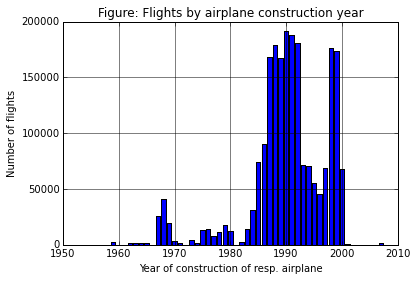

In [19]:
construction_year_stats = df_2000_with_aircraft.groupBy('constr_year').count().orderBy('constr_year', ascending=1).collect()

pdf_year_construction = pd.DataFrame(construction_year_stats)
plt.xlabel("Year of construction of resp. airplane")
plt.ylabel("Number of flights")
plt.title('Figure: Flights by airplane construction year')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_year_construction[0], pdf_year_construction[1], align="center")
plt.show()

In [20]:
print([(x[0], x[1]) for x in construction_year_stats])

[(None, 205731), (1956, 206), (1959, 2465), (1962, 1341), (1963, 1567), (1964, 1276), (1965, 1427), (1967, 25506), (1968, 40900), (1969, 19767), (1970, 3606), (1971, 1455), (1972, 247), (1973, 4263), (1974, 1551), (1975, 12902), (1976, 14288), (1977, 7444), (1978, 11579), (1979, 18145), (1980, 12100), (1982, 2605), (1983, 14114), (1984, 31548), (1985, 74396), (1986, 90595), (1987, 167939), (1988, 179382), (1989, 167356), (1990, 191164), (1991, 188186), (1992, 180379), (1993, 71331), (1994, 70282), (1995, 55594), (1996, 45127), (1997, 69255), (1998, 176166), (1999, 173777), (2000, 68260), (2001, 325), (2007, 2039)]


<h3>Comment</h3>
We see that by far most of the aircrafts used in 2000 were constructed between 1982 and 2000. We also have some outliers in the data (year of construction 2001 and 2007 respectively).

In [21]:
statistic_year_delay = (
    df_2000_with_aircraft
        .groupBy('constr_year')
        .agg(
            (func.mean('arrival_delay')).alias('mean_delay')
        )
        # order by constr_year
        .orderBy('constr_year')
    ).collect()

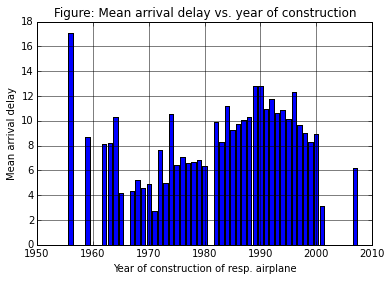

In [22]:
pdf_year_delay = pd.DataFrame(statistic_year_delay)
plt.xlabel("Year of construction of resp. airplane")
plt.ylabel("Mean arrival delay")
plt.title('Figure: Mean arrival delay vs. year of construction')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_year_delay[0], pdf_year_delay[1], align="center")
plt.show()

In [23]:
mean_delays = np.mean([row[1] for row in statistic_year_delay])
print(mean_delays)

print(statistic_year_delay)

8.5171403781
[Row(constr_year=None, mean_delay=9.983307983117244), Row(constr_year=1956, mean_delay=17.08252427184466), Row(constr_year=1959, mean_delay=8.69215128100854), Row(constr_year=1962, mean_delay=8.13089005235602), Row(constr_year=1963, mean_delay=8.186255619781631), Row(constr_year=1964, mean_delay=10.2748031496063), Row(constr_year=1965, mean_delay=4.174157303370786), Row(constr_year=1967, mean_delay=4.300121408336706), Row(constr_year=1968, mean_delay=5.2020048986187915), Row(constr_year=1969, mean_delay=4.575416361160574), Row(constr_year=1970, mean_delay=4.872529361214552), Row(constr_year=1971, mean_delay=2.713471133285816), Row(constr_year=1972, mean_delay=7.634146341463414), Row(constr_year=1973, mean_delay=5.018295618680789), Row(constr_year=1974, mean_delay=10.564766839378239), Row(constr_year=1975, mean_delay=6.455961844197138), Row(constr_year=1976, mean_delay=7.083333333333333), Row(constr_year=1977, mean_delay=6.582350492576661), Row(constr_year=1978, mean_delay=

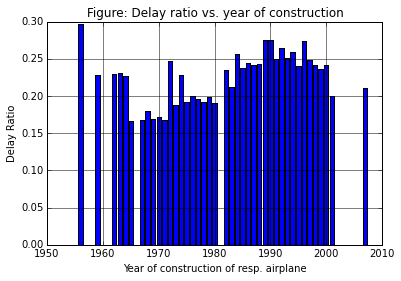

In [24]:
statistic_year_delay_ratio = (
    df_2000_with_aircraft
        .groupBy('constr_year')
        .agg(
            (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        )
        # order by constr_year
        .orderBy('constr_year')
    ).collect()

pdf_year_delay = pd.DataFrame(statistic_year_delay_ratio)
plt.xlabel("Year of construction of resp. airplane")
plt.ylabel("Delay Ratio")
plt.title('Figure: Delay ratio vs. year of construction')
plt.grid(True,which="both",ls="-")

# plot bar chart
plt.bar(pdf_year_delay[0], pdf_year_delay[1], align="center")
plt.show()

In [25]:
print(statistic_year_delay_ratio)

[Row(constr_year=None, delay_ratio=0.24465928809950857), Row(constr_year=1956, delay_ratio=0.2961165048543689), Row(constr_year=1959, delay_ratio=0.22880324543610547), Row(constr_year=1962, delay_ratio=0.22893363161819538), Row(constr_year=1963, delay_ratio=0.23037651563497127), Row(constr_year=1964, delay_ratio=0.22727272727272727), Row(constr_year=1965, delay_ratio=0.16608269096005607), Row(constr_year=1967, delay_ratio=0.16745079589116285), Row(constr_year=1968, delay_ratio=0.1804156479217604), Row(constr_year=1969, delay_ratio=0.1696767339505236), Row(constr_year=1970, delay_ratio=0.1719356627842485), Row(constr_year=1971, delay_ratio=0.1676975945017182), Row(constr_year=1972, delay_ratio=0.24696356275303644), Row(constr_year=1973, delay_ratio=0.18836500117288293), Row(constr_year=1974, delay_ratio=0.22823984526112184), Row(constr_year=1975, delay_ratio=0.19260579755076732), Row(constr_year=1976, delay_ratio=0.19953807390817468), Row(constr_year=1977, delay_ratio=0.195996775926921)

<h3>Comment</h3>
The delay ratio as well as the mean arrival delay statistics have a similar shape w.r.t. the aircraft construction year. It seems that aircrafts constructed between 1965 and 1980 were less prone to delays in 2000 than aircrafts constructed before or after (exception 1972, 1974). However, we have much less data in that range than for newer aircrafts.<br />
In the next step we should investigate on the impact of certain models to delays.

In [26]:
statistic_volume_manuf = df_2000_with_aircraft.groupBy('manufacturer').count() \
                        .orderBy('manufacturer').collect()

statistic_ratio_delay_manuf = df_2000_with_aircraft.groupBy('manufacturer') \
                        .agg(
                            (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
                        ) \
                        .orderBy('manufacturer').collect()

In [27]:
avg_delay = np.mean([x[1] for x in statistic_ratio_delay_manuf])
print(avg_delay)

0.228781080307


In [28]:
so = sorted(statistic_volume_manuf, key=lambda x: x[1], reverse=True)
print(so)

[Row(manufacturer='BG', count=1198090), Row(manufacturer='MD', count=361883), Row(manufacturer='AI', count=309941), Row(manufacturer='MDA', count=211914), Row(manufacturer='Unknown', count=194667), Row(manufacturer='DG', count=61178), Row(manufacturer='MDC', count=29519), Row(manufacturer='CS', count=11098), Row(manufacturer='PP', count=4308), Row(manufacturer='RV', count=3894), Row(manufacturer='BC', count=3521), Row(manufacturer='DAI', count=1630), Row(manufacturer='FJ', count=1418), Row(manufacturer='MB', count=1411), Row(manufacturer='SR', count=1377), Row(manufacturer='LGT', count=1373), Row(manufacturer='FCK', count=1319), Row(manufacturer='BL', count=1304), Row(manufacturer='HL', count=1276), Row(manufacturer='DV', count=1274), Row(manufacturer='WWR', count=1207), Row(manufacturer='MGJ', count=1043), Row(manufacturer='BR', count=1035), Row(manufacturer='AAI', count=621), Row(manufacturer='ACM', count=496), Row(manufacturer='AGS', count=325), Row(manufacturer='PME', count=239), R

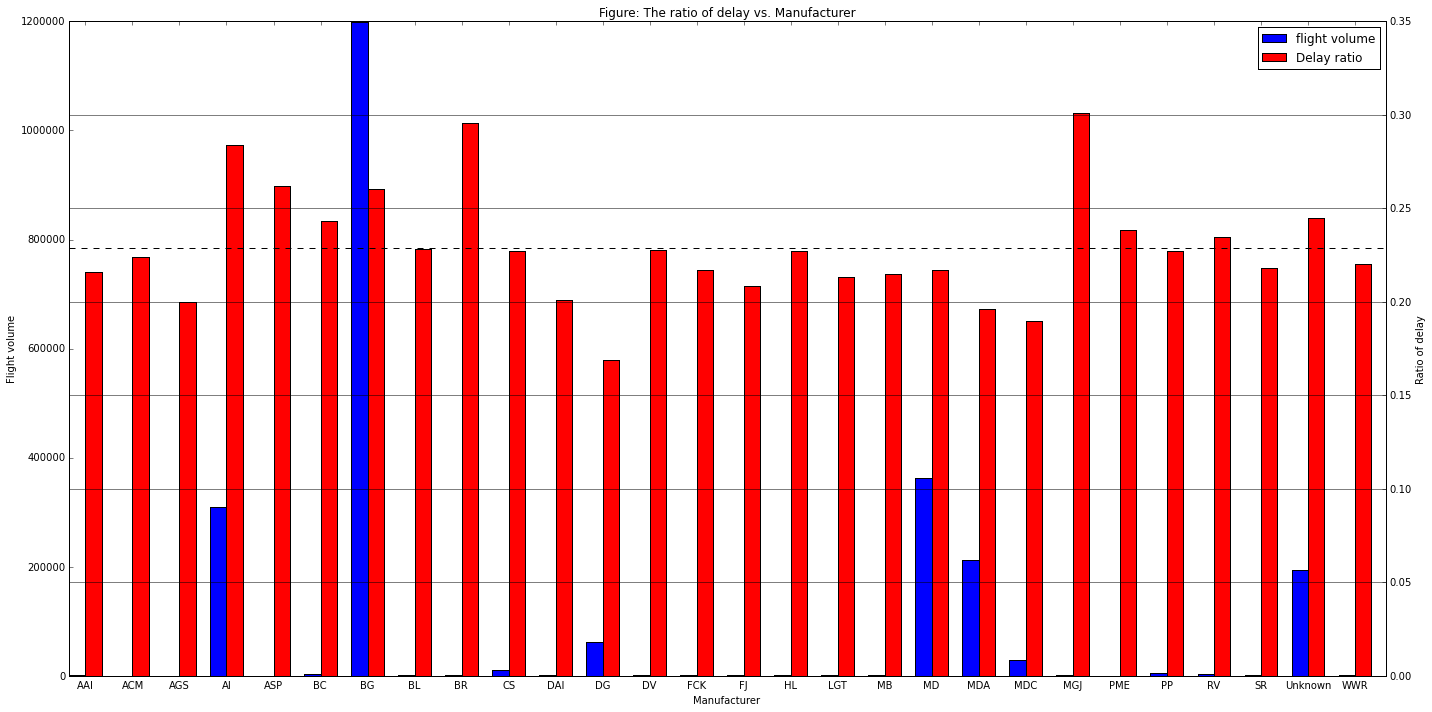

In [29]:
# collect data and plot
pdf_volume_manuf = pd.DataFrame(statistic_volume_manuf)
pdf_ratio_delay_manuf = pd.DataFrame(statistic_ratio_delay_manuf)
#print(pdf_top_20_airport_volume)
index = np.arange(len(pdf_volume_manuf))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, pdf_volume_manuf[0])
plt.title('Figure: The ratio of delay vs. Manufacturer')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_volume_manuf[1], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_manuf[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# draw threshold line
threshold = avg_delay
ax2.plot([0., len(pdf_volume_manuf)], [threshold, threshold], "k--")

plt.tight_layout()
plt.show()

<h3>Comment</h3>
In general, we see that the delays as well as the flight volume among manufacturers varies strongly. Boeing ("BG") aircrafts have by far been used the most. Their delay ratio is about 3% above average (dashed line). "MD", "MDA", "MDC" and "DG" all refer to McDonnell Douglas Corporation. There were fused with Boeing in 1997. There was even another fusion in 1967. Therefore, we have different aircraft brands that today all belong to Boeing. However, it is interesting to see that taken together, the McDonnell Douglas planes have an even bigger market share than Boeing. Moreover, they seem to be much less hit by delays than Boeing flights. Airbus airplanes ("AI") are the third most used ones in our dataset and seem to produce slightly less delays than Boeing aircrafts.

In the next section, we will investigate wether there are certain aircraft models that are particularly prone to delays.

In [30]:
statistic_ratio_delay_model = df_2000_with_aircraft \
                        .groupBy(['manufacturer', 'model']) \
                        .agg(
                            (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
                        ) \
                        .orderBy('delay_ratio', ascending=0).take(20)

In [31]:
statistic_volume_model = df_2000_with_aircraft \
                        .groupBy(['manufacturer', 'model']) \
                        .count() \
                        .orderBy('count', ascending=0).collect()

In [32]:
df_2000_with_aircraft.select('constr_year').count()

2407586

In [33]:
model_volume_dict = {}
for row in statistic_volume_model:
    model_volume_dict[row[1]] = row[2]

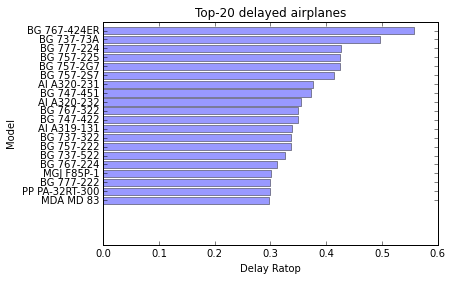

In [34]:
statistic_ratio_delay_model_reversed = list(reversed(statistic_ratio_delay_model))

y_pos = range(len(statistic_ratio_delay_model_reversed))
avg_delays = [w[2] for w in statistic_ratio_delay_model_reversed]
models = [" ".join((w[0], w[1])) for w in statistic_ratio_delay_model_reversed]

plt.barh(y_pos, avg_delays, align='center', alpha=0.4)
plt.yticks(y_pos, models)
plt.xlabel('Delay Ratop')
plt.ylabel('Model')
plt.title('Top-20 delayed airplanes')
plt.show()

In [35]:
[(" ".join((x[0], x[1])), model_volume_dict[x[1]]) for x in statistic_ratio_delay_model]

[('BG 767-424ER', 95),
 ('BG 737-73A', 183),
 ('BG 777-224', 129),
 ('BG 757-225', 4414),
 ('BG 757-2G7', 5064),
 ('BG 757-2S7', 9220),
 ('AI A320-231', 23263),
 ('BG 747-451', 51),
 ('AI A320-232', 89623),
 ('BG 767-322', 18344),
 ('BG 747-422', 1692),
 ('AI A319-131', 33544),
 ('BG 737-322', 120316),
 ('BG 757-222', 111290),
 ('BG 737-522', 64549),
 ('BG 767-224', 93),
 ('MGJ F85P-1', 1043),
 ('BG 777-222', 12889),
 ('PP PA-32RT-300', 260),
 ('MDA MD 83', 3004)]

<h3>Comment</h3>
Indeed, we see a lot of Boeing airplanes in the top 20 of the most delay-prone airplanes. The boeing 767-424ER  has almost the double delay ratio as the MacDunnell Douglas 83.<br />
However, the 767-424ER is hardly ever used (only 95 flights). Looking also at the flight volume, we find that the A320-231, A320-232, 737-322, 757-222 and the 737-522 have a strong weight in causing the high delay ratios of Airbus and Boeing. They are all small to medium distance airplanes.

In the next step we want to retrain the random forest along with the new data that we obtained to see if we can improve prediction performance.<br />
For this we need to preprocess the augmented year 2000 dataset in the same way as before.

Calculate the frequency of each source aiport in the data and build a dictionary that maps each of them to a unique index.

In [36]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df_2000_with_aircraft
        .groupBy('src_airport')
        .agg(func.count('*').alias('count1'))
        .orderBy(desc('count1'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

1
0


Calculate the frequency of each destination aiport in the data and build a dictionary that maps each of them to a unique index.

In [37]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df_2000_with_aircraft
        .groupBy('dest_airport')
        .agg(func.count('*').alias('count2'))
        .orderBy(desc('count2'))
    )

dest_airports = [item[0] for item in stat_dest.collect()]

num_dest_airports = len(dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, range(0, num_dest_airports)))

# test the dictionary
print(map_dest_airport_to_index['ORD'])
print(map_dest_airport_to_index['ATL'])

1
0


Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.

In [38]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top

stat_carr = (
    df_2000_with_aircraft
        .groupBy('carrier')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

carriers = [item[0] for item in stat_carr.collect()]

num_carriers = len(carriers)
map_carriers_to_index = dict(zip(carriers, range(0, num_carriers)))

print(map_carriers_to_index['DL'])
print(map_carriers_to_index['AA'])

0
1


Find the most common value of feature month in data.

In [39]:
the_most_common_month = (
    df_2000_with_aircraft
        .groupBy('month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 10


Find the most common value of features day_of_month and day_of_week.

In [40]:
the_most_common_day_of_month = (
    df_2000_with_aircraft
        .groupBy('day_of_month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df_2000_with_aircraft
        .groupBy('day_of_week')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 7
The most common day of week: 5


Find the most common value of features scheduled_departure_time and scheduled_arrival_time.

In [41]:
the_most_common_s_departure_time = (
    df_2000_with_aircraft
        .groupBy('scheduled_departure_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df_2000_with_aircraft
        .groupBy('scheduled_arrival_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 2115


Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature distance later.

In [42]:
# calculate mean distance
mean_distance = (
    df_2000_with_aircraft
        .agg(func.avg('distance').alias('avg'))
    ).first()[0]

print("mean distance:", mean_distance)

mean distance: 924.4145654610054


Calculate the mean of arrival delay.

In [43]:
# calculate mean arrival delay
mean_arrival_delay = (
    df_2000_with_aircraft
        .agg(func.avg('arrival_delay').alias('avg'))
    ).first()[0]

print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 10.159633979226692


Get the most prominent manufacturer.

In [44]:
# select distinct manufacturers and map values to index
# sort manufacturers by their frequency descending
# so the most common manufacturer will be on the top

stat_manuf = (
    df_2000_with_aircraft
        .groupBy('manufacturer')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

manufacturers = [item[0] for item in stat_manuf.collect()]

num_manufacturers = len(manufacturers)
map_manuf_to_index = dict(zip(manufacturers, range(0, num_manufacturers)))

print(map_manuf_to_index['BG'])

0


Get the most prominent model.

In [45]:
# select distinct models and map values to index
# sort models by their frequency descending
# so the most common model will be on the top

stat_model = (
    df_2000_with_aircraft
        .groupBy('model')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

models = [item[0] for item in stat_model.collect()]

num_models = len(models)
map_models_to_index = dict(zip(models, range(0, num_models)))

print(map_models_to_index['737-832'])

23


In [48]:
print(models[0])

MD-88


Get the most common construction year.

In [46]:
# select distinct constr. years and map values to index
# sort years by their frequency descending
# so the most common year will be on the top

stat_year = (
    df_2000_with_aircraft
        .groupBy('constr_year')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

years = [item[0] for item in stat_year.collect()]

num_years = len(years)
map_years_to_index = dict(zip(years, range(0, num_years)))

print(map_years_to_index[1990])

1


In [64]:
print(map_years_to_index)

{1984: 18, 1985: 10, 1986: 9, 1987: 7, 1988: 4, 1989: 8, 1990: 1, 1991: 2, 1992: 3, 1993: 11, 1994: 12, 1995: 15, 1996: 16, 1997: 13, 1998: 5, 1999: 6, 2000: 14, 1963: 33, 2007: 32, 1956: 41, 1959: 31, 1962: 37, None: 0, 1964: 38, 1965: 36, 1967: 19, 1968: 17, 1969: 20, 1970: 29, 1971: 35, 1972: 40, 1973: 28, 1974: 34, 1975: 24, 1976: 22, 1977: 27, 1978: 26, 1979: 21, 1980: 25, 2001: 39, 1982: 30, 1983: 23}


In [34]:
print(df_2000_with_aircraft.schema)

StructType(List(StructField(year,IntegerType,true),StructField(month,IntegerType,true),StructField(day_of_month,IntegerType,true),StructField(day_of_week,IntegerType,true),StructField(scheduled_departure_time,IntegerType,true),StructField(scheduled_arrival_time,IntegerType,true),StructField(arrival_delay,IntegerType,true),StructField(distance,IntegerType,true),StructField(src_airport,StringType,true),StructField(dest_airport,StringType,true),StructField(carrier,StringType,true),StructField(tail_number,StringType,true),StructField(is_delay,IntegerType,false),StructField(tailnum,StringType,true),StructField(type,StringType,true),StructField(manufacturer,StringType,true),StructField(issue_date,StringType,true),StructField(model,StringType,true),StructField(status,StringType,true),StructField(aircraft_type,StringType,true),StructField(engine_type,StringType,true),StructField(constr_year,IntegerType,true)))


Replace the missing values of each feature in our data by the corresponding most common value or mean.
Divide data into two parts: 70% for training and 30% for testing

In [52]:
df_2000_with_aircraft.count()

2407586

In [47]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != None and value != "" and value != "NA"

data = df_2000_with_aircraft.rdd\
    .map(lambda values: 
        LabeledPoint( 
            int(values[6]) if is_valid(values[6]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[4]) if is_valid(values[4]) else the_most_common_s_departure_time , # scheduled departure time
                int(values[5]) if is_valid(values[5]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[10]] if is_valid(values[10]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[8]] if is_valid(values[8]) \
                    else map_src_airport_to_index[src_airports[0]], # src_airport
                map_dest_airport_to_index[values[9]] if is_valid(values[9]) \
                    else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                
                
                map_manuf_to_index[values[15]] if is_valid(values[15]) \
                    else map_manuf_to_index[manufacturers[0]], # manufacturers
                map_models_to_index[values[17]] if is_valid(values[17]) \
                    else map_models_to_index['737-3S3'],
                #else map_models_to_index[models[0]], # models
                map_years_to_index[values[21]] if is_valid(values[21]) \
                    else map_years_to_index[1983],
                #else map_years_to_index[years[1]], # constr years
                
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                
                
                int(values[7]) if is_valid(values[7]) else mean_distance # distance
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7,0.3))

trainingData = trainingData.cache()
testData = testData.cache()

Complete the code below to train a decision tree model.

In [48]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports,
                   9: num_manufacturers, 10: num_models, 11: num_years, 12: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

We often use Mean Square Error as a metric to evaluate the quality of a tree model. Complete the code below to calculate the MSE of our trained model.

In [49]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 1290.5654819274412


Random Forest Training

In [51]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)


forest_predictions = forest_model.predict(testData.map(lambda x: x.features))
forest_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(forest_predictions)
testMSE = forest_labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 1231.2422315621986


<h3>Comment</h3>
Using the aircraft information did not improve the model in our case. The mean squared error becomes 1231 with the aircraft model information compared to around 800 without.<br />
This may have multiple reasons:<br />
<ul>
<li>The size of the dataset was reduced by around 50% (only half of the flights have a valid tail_number that could be matched)</li>
<li>By far most of the flights were conducted using aircrafts from similar manufacturers. There is very little data for most manufacturers</li>
<li>There is not a lot of data for each specific airplane model</li>
<li>The same goes for the construction years</li>
</ul>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.